In [213]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np


In [214]:
df = pd.read_csv("/Users/jiachengpeng/Desktop/MMAI 5000/Group Project Data-SFD Data-Toronto Police.csv")

Import raw Toronto Police data file

In [215]:
df


,X,Y,OBJECTID,EVENT_UNIQUE_ID,OCC_DATE,OCC_YEAR,OCC_MONTH,OCC_DOW,OCC_DOY,OCC_DAY,...,OCC_TIME_RANGE,DIVISION,DEATH,INJURIES,HOOD_158,NEIGHBOURHOOD_158,HOOD_140,NEIGHBOURHOOD_140,LONG_WGS84,LAT_WGS84
0,-79.234955,43.781528,1,GO-2004397105,2004/05/15 04:00:00+00,2004,May,Saturday,136,15,...,Night,D41,0,0,142,Woburn North,137,Woburn (137),-79.234955,43.781528
1,-79.618218,43.733547,2,GO-2004600109,2004/07/26 04:00:00+00,2004,July,Monday,208,26,...,Evening,D23,0,0,1,West Humber-Clairville,1,West Humber-Clairville (1),-79.618218,43.733547
2,-79.518759,43.769157,3,GO-2004311851,2004/05/14 04:00:00+00,2004,May,Friday,135,14,...,Afternoon,D31,1,1,24,Black Creek,24,Black Creek (24),-79.518759,43.769157
3,-79.378870,43.660665,4,GO-2004736004,2004/12/19 05:00:00+00,2004,December,Sunday,354,19,...,Night,D51,1,0,168,Downtown Yonge East,75,Church-Yonge Corridor (75),-79.378870,43.660665
4,-79.212435,43.812075,5,GO-2004303455,2004/04/12 04:00:00+00,2004,April,Monday,103,12,...,Evening,D42,0,0,146,Malvern East,132,Malvern (132),-79.212435,43.812075
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5702,-79.362941,43.771764,5703,GO-20221038418,2022/06/02 04:00:00+00,2022,June,Thursday,153,2,...,Night,D33,0,1,53,Henry Farm,53,Henry Farm (53),-79.362941,43.771764
5703,-79.402702,43.643920,5704,GO-20221362949,2022/07/17 04:00:00+00,2022,July,Sunday,198,17,...,Night,D14,1,1,164,Wellington Place,77,Waterfront Communities-The Island (77),-79.402702,43.643920
5704,-79.196217,43.786621,5705,GO-2022336423,2022/02/21 05:00:00+00,2022,February,Monday,52,21,...,Night,D43,0,0,135,Morningside,135,Morningside (135),-79.196217,43.786621
5705,-79.443993,43.658083,5706,GO-20221765442,2022/09/11 04:00:00+00,2022,September,Sunday,254,11,...,Night,D11,0,2,83,Dufferin Grove,83,Dufferin Grove (83),-79.443993,43.658083


In [216]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5707 entries, 0 to 5706
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   X                  5707 non-null   float64
 1   Y                  5707 non-null   float64
 2   OBJECTID           5707 non-null   int64  
 3   EVENT_UNIQUE_ID    5707 non-null   object 
 4   OCC_DATE           5707 non-null   object 
 5   OCC_YEAR           5707 non-null   int64  
 6   OCC_MONTH          5707 non-null   object 
 7   OCC_DOW            5707 non-null   object 
 8   OCC_DOY            5707 non-null   int64  
 9   OCC_DAY            5707 non-null   int64  
 10  OCC_HOUR           5707 non-null   int64  
 11  OCC_TIME_RANGE     5707 non-null   object 
 12  DIVISION           5707 non-null   object 
 13  DEATH              5707 non-null   int64  
 14  INJURIES           5707 non-null   int64  
 15  HOOD_158           5707 non-null   object 
 16  NEIGHBOURHOOD_158  5707 

To identify the number of columns in dataframe and the type of respective variables and how many are null value in each columns.

In [217]:
df.describe()

,X,Y,OBJECTID,OCC_YEAR,OCC_DOY,OCC_DAY,OCC_HOUR,DEATH,INJURIES,LONG_WGS84,LAT_WGS84
count,5707.000000,5707.000000,5707.000000,5707.000000,5707.000000,5707.000000,5707.000000,5707.000000,5707.000000,5707.000000,5707.000000
mean,-79.481115,43.244138,2854.000000,2014.460662,187.198178,15.901174,12.099527,0.122481,0.488172,-79.481115,43.244138
std,0.640212,4.532671,1647.613324,5.468803,100.269326,8.819631,8.685588,0.349599,0.779148,0.640212,4.532671
min,-85.488744,0.000000,1.000000,2004.000000,1.000000,1.000000,0.000000,0.000000,0.000000,-85.488744,0.000000
25%,-79.513346,43.676604,1427.500000,2010.000000,106.000000,8.000000,3.000000,0.000000,0.000000,-79.513346,43.676604
50%,-79.439740,43.720796,2854.000000,2016.000000,192.000000,16.000000,15.000000,0.000000,0.000000,-79.439740,43.720796
75%,-79.328082,43.755306,4280.500000,2019.000000,268.000000,23.000000,20.000000,0.000000,1.000000,-79.328082,43.755306
max,-79.122053,43.838273,5707.000000,2022.000000,366.000000,31.000000,23.000000,3.000000,24.000000,-79.122053,43.838273



To identify the basic statistical parameters like mean, max, min etc for the variables which are integers and float

In [218]:
df2 =pd.unique(df["DIVISION"])


In [219]:
df1 = df["DIVISION"].nunique()
print("Number of unique division: "+str(df1))
print(df["NEIGHBOURHOOD_158"].nunique())
print(df["NEIGHBOURHOOD_140"].nunique())


Number of unique division: 17
159
140


To identify number of unique divisions and neighborhoods in respective areas.

In [220]:
print("Number of unique year: "+str(df["OCC_YEAR"].nunique()))
df11=df.groupby(["OCC_YEAR"])["NEIGHBOURHOOD_158"].nunique().reset_index()
print(df11)

Number of unique year: 19
    OCC_YEAR  NEIGHBOURHOOD_158
0       2004                 75
1       2005                 99
2       2006                 83
3       2007                 79
4       2008                 93
5       2009                 89
6       2010                 88
7       2011                 87
8       2012                 82
9       2013                 79
10      2014                 80
11      2015                 94
12      2016                109
13      2017                105
14      2018                117
15      2019                120
16      2020                116
17      2021                113
18      2022                120


To identify number of unique years

Draw a lineplot showing total death and injuries over years.

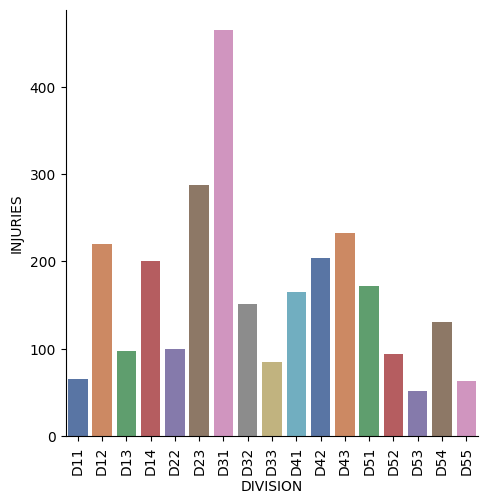

In [221]:
df13=df.groupby(["DIVISION"])["INJURIES"].sum().reset_index()
sns.catplot(x="DIVISION",y="INJURIES",data=df13,kind="bar",palette="deep")
plt.xticks(rotation=90)
plt.show()

Draw a bar chart with total injuries in each division

In [222]:
df3= df.groupby(["DIVISION"])["NEIGHBOURHOOD_158"].nunique().reset_index()
print(df3)

   DIVISION  NEIGHBOURHOOD_158
0       D11                 15
1       D12                 16
2       D13                 14
3       D14                 20
4       D22                 18
5       D23                 15
6       D31                 25
7       D32                 25
8       D33                 20
9       D41                 17
10      D42                 21
11      D43                 19
12      D51                 15
13      D52                 12
14      D53                 15
15      D54                 18
16      D55                 10


Identify multiple neighborhood to single divisions

In [223]:
print(df["NEIGHBOURHOOD_158"][df["DIVISION"]=="D11"].unique())
print(df["NEIGHBOURHOOD_158"][df["DIVISION"]=="D12"].unique())
print(df["NEIGHBOURHOOD_158"][df["DIVISION"]=="D51"].unique())



['Runnymede-Bloor West Village' 'High Park North'
 'Junction-Wallace Emerson' 'South Parkdale' 'Roncesvalles' 'NSA'
 'Oakridge' 'Lambton Baby Point' 'Junction Area' 'High Park-Swansea'
 'Weston-Pelham Park' 'Dufferin Grove' 'Little Portugal'
 'East End-Danforth' 'Rockcliffe-Smythe']
['Weston' 'Rockcliffe-Smythe' 'Brookhaven-Amesbury'
 'Keelesdale-Eglinton West' 'Weston-Pelham Park' 'Junction Area'
 'Humbermede' 'NSA' 'Mount Dennis' 'Beechborough-Greenbrook'
 'Yonge-Bay Corridor' 'Thistletown-Beaumond Heights' 'Rustic'
 'Pelmo Park-Humberlea' 'Maple Leaf' 'Oakdale-Beverley Heights']
['Downtown Yonge East' 'Regent Park' 'NSA' 'Moss Park'
 'North St.James Town' 'Cabbagetown-South St.James Town'
 'Rosedale-Moore Park' 'Church-Wellesley'
 'St Lawrence-East Bayfront-The Islands' 'Dorset Park' 'South Riverdale'
 'Morningside Heights' 'Yonge-St.Clair' 'Taylor-Massey' 'Thorncliffe Park']


After analyzing the above neighborhoods within each division we suspect that NSA refers to neighborhood that are not identifiable

In [224]:
print(df[df["NEIGHBOURHOOD_158"] == "NSA"])

              X    Y  OBJECTID EVENT_UNIQUE_ID                OCC_DATE   
9    -85.488744  0.0        10   GO-2004683174  2004/10/15 04:00:00+00  \
22   -85.488744  0.0        23   GO-2004591518  2004/09/03 04:00:00+00   
27   -85.488744  0.0        28   GO-2004577384  2004/07/09 04:00:00+00   
78   -85.488744  0.0        79   GO-2004120070  2004/01/03 05:00:00+00   
112  -85.488744  0.0       113   GO-2004692390  2004/10/23 04:00:00+00   
...         ...  ...       ...             ...                     ...   
2184 -85.488744  0.0      2185  GO-20134907315  2013/03/28 04:00:00+00   
2223 -85.488744  0.0      2224  GO-20135154184  2013/10/03 04:00:00+00   
2250 -85.488744  0.0      2251  GO-20135164075  2013/08/21 04:00:00+00   
2258 -85.488744  0.0      2259  GO-20135072874  2013/07/01 04:00:00+00   
2259 -85.488744  0.0      2260  GO-20134785610  2013/01/16 05:00:00+00   

      OCC_YEAR  OCC_MONTH    OCC_DOW  OCC_DOY  OCC_DAY  ...  OCC_TIME_RANGE   
9         2004    October     Fr

We have identify 64 rows for which neighbourhood is marked NSA


In [225]:
df
df10=df.groupby(["NEIGHBOURHOOD_158"]).agg({"INJURIES":"sum","DEATH":"sum"}).reset_index()
df10[df10["NEIGHBOURHOOD_158"] == "NSA"]


,NEIGHBOURHOOD_158,INJURIES,DEATH
97,NSA,41,5


we have identified how many death and injuries in those dataset which has NSA

In [226]:
print(df[df["DEATH"] < 0])
print(df[df["INJURIES"] < 0])

Empty DataFrame
Columns: [X, Y, OBJECTID, EVENT_UNIQUE_ID, OCC_DATE, OCC_YEAR, OCC_MONTH, OCC_DOW, OCC_DOY, OCC_DAY, OCC_HOUR, OCC_TIME_RANGE, DIVISION, DEATH, INJURIES, HOOD_158, NEIGHBOURHOOD_158, HOOD_140, NEIGHBOURHOOD_140, LONG_WGS84, LAT_WGS84]
Index: []

[0 rows x 21 columns]
Empty DataFrame
Columns: [X, Y, OBJECTID, EVENT_UNIQUE_ID, OCC_DATE, OCC_YEAR, OCC_MONTH, OCC_DOW, OCC_DOY, OCC_DAY, OCC_HOUR, OCC_TIME_RANGE, DIVISION, DEATH, INJURIES, HOOD_158, NEIGHBOURHOOD_158, HOOD_140, NEIGHBOURHOOD_140, LONG_WGS84, LAT_WGS84]
Index: []

[0 rows x 21 columns]


We have checked there is no negative value in INJURIES and DEATH columns

In [227]:
df4= df.groupby(["NEIGHBOURHOOD_158"])["DIVISION"].nunique().reset_index().sort_values(by="DIVISION",ascending= False)
print(df4)

       NEIGHBOURHOOD_158  DIVISION
97                   NSA        14
153   Yonge-Bay Corridor         8
26   Clairlea-Birchmount         6
36   Downtown Yonge East         5
121               Rustic         5
..                   ...       ...
94          Mount Dennis         1
93             Moss Park         1
43      Elms-Old Rexdale         1
90      Mimico-Queensway         1
0        Agincourt North         1

[159 rows x 2 columns]


Showing Neighborhood which have multiple divisions

In [228]:
df4[df4["DIVISION"]>1]

,NEIGHBOURHOOD_158,DIVISION
97,NSA,14
153,Yonge-Bay Corridor,8
26,Clairlea-Birchmount,6
36,Downtown Yonge East,5
121,Rustic,5
...,...,...
3,Annex,2
54,Golfdale-Cedarbrae-Woburn,2
57,Harbourfront-CityPlace,2
30,Danforth,2


Checking how many neighborhood has more than one division.

In [229]:
df5 = df.replace("NSA","Other")
print(df5[df5["NEIGHBOURHOOD_158"] == "NSA"])


Empty DataFrame
Columns: [X, Y, OBJECTID, EVENT_UNIQUE_ID, OCC_DATE, OCC_YEAR, OCC_MONTH, OCC_DOW, OCC_DOY, OCC_DAY, OCC_HOUR, OCC_TIME_RANGE, DIVISION, DEATH, INJURIES, HOOD_158, NEIGHBOURHOOD_158, HOOD_140, NEIGHBOURHOOD_140, LONG_WGS84, LAT_WGS84]
Index: []

[0 rows x 21 columns]


Changing "NSA" to "Other"

In [230]:
df5["D_NEIGHBOURHOOD158"]=  df5["NEIGHBOURHOOD_158"] + df5["DIVISION"]
df5

,X,Y,OBJECTID,EVENT_UNIQUE_ID,OCC_DATE,OCC_YEAR,OCC_MONTH,OCC_DOW,OCC_DOY,OCC_DAY,...,DIVISION,DEATH,INJURIES,HOOD_158,NEIGHBOURHOOD_158,HOOD_140,NEIGHBOURHOOD_140,LONG_WGS84,LAT_WGS84,D_NEIGHBOURHOOD158
0,-79.234955,43.781528,1,GO-2004397105,2004/05/15 04:00:00+00,2004,May,Saturday,136,15,...,D41,0,0,142,Woburn North,137,Woburn (137),-79.234955,43.781528,Woburn NorthD41
1,-79.618218,43.733547,2,GO-2004600109,2004/07/26 04:00:00+00,2004,July,Monday,208,26,...,D23,0,0,1,West Humber-Clairville,1,West Humber-Clairville (1),-79.618218,43.733547,West Humber-ClairvilleD23
2,-79.518759,43.769157,3,GO-2004311851,2004/05/14 04:00:00+00,2004,May,Friday,135,14,...,D31,1,1,24,Black Creek,24,Black Creek (24),-79.518759,43.769157,Black CreekD31
3,-79.378870,43.660665,4,GO-2004736004,2004/12/19 05:00:00+00,2004,December,Sunday,354,19,...,D51,1,0,168,Downtown Yonge East,75,Church-Yonge Corridor (75),-79.378870,43.660665,Downtown Yonge EastD51
4,-79.212435,43.812075,5,GO-2004303455,2004/04/12 04:00:00+00,2004,April,Monday,103,12,...,D42,0,0,146,Malvern East,132,Malvern (132),-79.212435,43.812075,Malvern EastD42
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5702,-79.362941,43.771764,5703,GO-20221038418,2022/06/02 04:00:00+00,2022,June,Thursday,153,2,...,D33,0,1,53,Henry Farm,53,Henry Farm (53),-79.362941,43.771764,Henry FarmD33
5703,-79.402702,43.643920,5704,GO-20221362949,2022/07/17 04:00:00+00,2022,July,Sunday,198,17,...,D14,1,1,164,Wellington Place,77,Waterfront Communities-The Island (77),-79.402702,43.643920,Wellington PlaceD14
5704,-79.196217,43.786621,5705,GO-2022336423,2022/02/21 05:00:00+00,2022,February,Monday,52,21,...,D43,0,0,135,Morningside,135,Morningside (135),-79.196217,43.786621,MorningsideD43
5705,-79.443993,43.658083,5706,GO-20221765442,2022/09/11 04:00:00+00,2022,September,Sunday,254,11,...,D11,0,2,83,Dufferin Grove,83,Dufferin Grove (83),-79.443993,43.658083,Dufferin GroveD11


Since there are multiple divisions for each neighbourhood we will be combining DIVISION + NEIGHBOURHOOD158 to generate an additional column with unique neighborhood associated with divisions


In [231]:
df5["AFFECTED_PEOPLE"]=  df5["DEATH"] + df5["INJURIES"]
df5

,X,Y,OBJECTID,EVENT_UNIQUE_ID,OCC_DATE,OCC_YEAR,OCC_MONTH,OCC_DOW,OCC_DOY,OCC_DAY,...,DEATH,INJURIES,HOOD_158,NEIGHBOURHOOD_158,HOOD_140,NEIGHBOURHOOD_140,LONG_WGS84,LAT_WGS84,D_NEIGHBOURHOOD158,AFFECTED_PEOPLE
0,-79.234955,43.781528,1,GO-2004397105,2004/05/15 04:00:00+00,2004,May,Saturday,136,15,...,0,0,142,Woburn North,137,Woburn (137),-79.234955,43.781528,Woburn NorthD41,0
1,-79.618218,43.733547,2,GO-2004600109,2004/07/26 04:00:00+00,2004,July,Monday,208,26,...,0,0,1,West Humber-Clairville,1,West Humber-Clairville (1),-79.618218,43.733547,West Humber-ClairvilleD23,0
2,-79.518759,43.769157,3,GO-2004311851,2004/05/14 04:00:00+00,2004,May,Friday,135,14,...,1,1,24,Black Creek,24,Black Creek (24),-79.518759,43.769157,Black CreekD31,2
3,-79.378870,43.660665,4,GO-2004736004,2004/12/19 05:00:00+00,2004,December,Sunday,354,19,...,1,0,168,Downtown Yonge East,75,Church-Yonge Corridor (75),-79.378870,43.660665,Downtown Yonge EastD51,1
4,-79.212435,43.812075,5,GO-2004303455,2004/04/12 04:00:00+00,2004,April,Monday,103,12,...,0,0,146,Malvern East,132,Malvern (132),-79.212435,43.812075,Malvern EastD42,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5702,-79.362941,43.771764,5703,GO-20221038418,2022/06/02 04:00:00+00,2022,June,Thursday,153,2,...,0,1,53,Henry Farm,53,Henry Farm (53),-79.362941,43.771764,Henry FarmD33,1
5703,-79.402702,43.643920,5704,GO-20221362949,2022/07/17 04:00:00+00,2022,July,Sunday,198,17,...,1,1,164,Wellington Place,77,Waterfront Communities-The Island (77),-79.402702,43.643920,Wellington PlaceD14,2
5704,-79.196217,43.786621,5705,GO-2022336423,2022/02/21 05:00:00+00,2022,February,Monday,52,21,...,0,0,135,Morningside,135,Morningside (135),-79.196217,43.786621,MorningsideD43,0
5705,-79.443993,43.658083,5706,GO-20221765442,2022/09/11 04:00:00+00,2022,September,Sunday,254,11,...,0,2,83,Dufferin Grove,83,Dufferin Grove (83),-79.443993,43.658083,Dufferin GroveD11,2


We added an additional column with affected people to see severity that how many have been affected

In [232]:
df5.describe()

,X,Y,OBJECTID,OCC_YEAR,OCC_DOY,OCC_DAY,OCC_HOUR,DEATH,INJURIES,LONG_WGS84,LAT_WGS84,AFFECTED_PEOPLE
count,5707.000000,5707.000000,5707.000000,5707.000000,5707.000000,5707.000000,5707.000000,5707.000000,5707.000000,5707.000000,5707.000000,5707.000000
mean,-79.481115,43.244138,2854.000000,2014.460662,187.198178,15.901174,12.099527,0.122481,0.488172,-79.481115,43.244138,0.610654
std,0.640212,4.532671,1647.613324,5.468803,100.269326,8.819631,8.685588,0.349599,0.779148,0.640212,4.532671,0.839658
min,-85.488744,0.000000,1.000000,2004.000000,1.000000,1.000000,0.000000,0.000000,0.000000,-85.488744,0.000000,0.000000
25%,-79.513346,43.676604,1427.500000,2010.000000,106.000000,8.000000,3.000000,0.000000,0.000000,-79.513346,43.676604,0.000000
50%,-79.439740,43.720796,2854.000000,2016.000000,192.000000,16.000000,15.000000,0.000000,0.000000,-79.439740,43.720796,0.000000
75%,-79.328082,43.755306,4280.500000,2019.000000,268.000000,23.000000,20.000000,0.000000,1.000000,-79.328082,43.755306,1.000000
max,-79.122053,43.838273,5707.000000,2022.000000,366.000000,31.000000,23.000000,3.000000,24.000000,-79.122053,43.838273,26.000000


To identify outliers in column INJURIES and DEATH

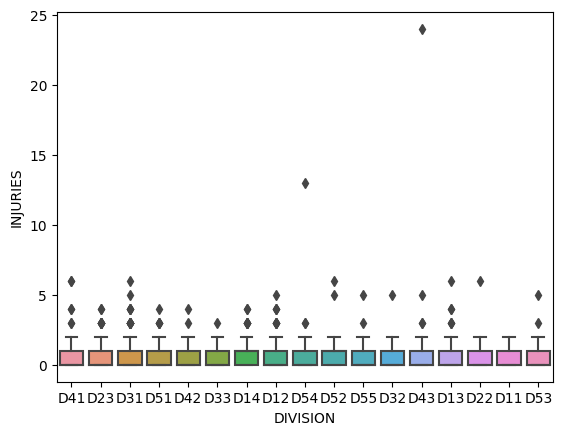

In [233]:
sns.boxplot(x="DIVISION",y="INJURIES",data=df5)
plt.show()

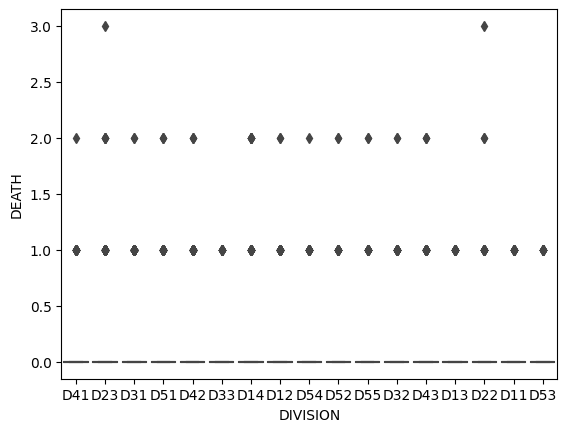

In [234]:
sns.boxplot(x="DIVISION",y="DEATH",data=df5)
plt.show()

To identify the outliers in INJURIES and DEATH by division

In [235]:
df6=df5.loc[:,["INJURIES","DIVISION"]]
df6[df6["INJURIES"]>10]


,INJURIES,DIVISION
1853,24,D43
3727,13,D54


We investigated the outliers of 24 injuries and 13 injuries and found them to be factual however the inclusion of these points will skew further analysis.
Therefore we are dropping it from the data set = df5

In [236]:
df7 = df5.drop([1853,3727])



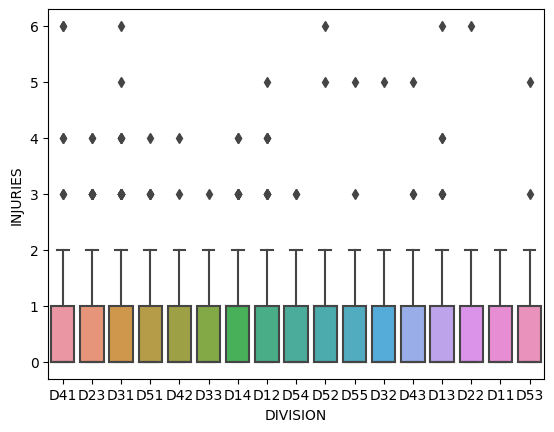

In [237]:
sns.boxplot(x="DIVISION",y="INJURIES",data=df7)
plt.show()

In [238]:
df7


,X,Y,OBJECTID,EVENT_UNIQUE_ID,OCC_DATE,OCC_YEAR,OCC_MONTH,OCC_DOW,OCC_DOY,OCC_DAY,...,DEATH,INJURIES,HOOD_158,NEIGHBOURHOOD_158,HOOD_140,NEIGHBOURHOOD_140,LONG_WGS84,LAT_WGS84,D_NEIGHBOURHOOD158,AFFECTED_PEOPLE
0,-79.234955,43.781528,1,GO-2004397105,2004/05/15 04:00:00+00,2004,May,Saturday,136,15,...,0,0,142,Woburn North,137,Woburn (137),-79.234955,43.781528,Woburn NorthD41,0
1,-79.618218,43.733547,2,GO-2004600109,2004/07/26 04:00:00+00,2004,July,Monday,208,26,...,0,0,1,West Humber-Clairville,1,West Humber-Clairville (1),-79.618218,43.733547,West Humber-ClairvilleD23,0
2,-79.518759,43.769157,3,GO-2004311851,2004/05/14 04:00:00+00,2004,May,Friday,135,14,...,1,1,24,Black Creek,24,Black Creek (24),-79.518759,43.769157,Black CreekD31,2
3,-79.378870,43.660665,4,GO-2004736004,2004/12/19 05:00:00+00,2004,December,Sunday,354,19,...,1,0,168,Downtown Yonge East,75,Church-Yonge Corridor (75),-79.378870,43.660665,Downtown Yonge EastD51,1
4,-79.212435,43.812075,5,GO-2004303455,2004/04/12 04:00:00+00,2004,April,Monday,103,12,...,0,0,146,Malvern East,132,Malvern (132),-79.212435,43.812075,Malvern EastD42,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5702,-79.362941,43.771764,5703,GO-20221038418,2022/06/02 04:00:00+00,2022,June,Thursday,153,2,...,0,1,53,Henry Farm,53,Henry Farm (53),-79.362941,43.771764,Henry FarmD33,1
5703,-79.402702,43.643920,5704,GO-20221362949,2022/07/17 04:00:00+00,2022,July,Sunday,198,17,...,1,1,164,Wellington Place,77,Waterfront Communities-The Island (77),-79.402702,43.643920,Wellington PlaceD14,2
5704,-79.196217,43.786621,5705,GO-2022336423,2022/02/21 05:00:00+00,2022,February,Monday,52,21,...,0,0,135,Morningside,135,Morningside (135),-79.196217,43.786621,MorningsideD43,0
5705,-79.443993,43.658083,5706,GO-20221765442,2022/09/11 04:00:00+00,2022,September,Sunday,254,11,...,0,2,83,Dufferin Grove,83,Dufferin Grove (83),-79.443993,43.658083,Dufferin GroveD11,2


In [239]:
df7["SEASON"]=df7["OCC_MONTH"]
df7.loc[ (df7["SEASON"]=="December") | (df7["SEASON"]=="January")|(df7["SEASON"]=="February")  ,"SEASON"]="Winter"
df7.loc[ (df7["SEASON"]=="March") | (df7["SEASON"]=="April")|(df7["SEASON"]=="May")  ,"SEASON"]="Spring"
df7.loc[ (df7["SEASON"]=="June") | (df7["SEASON"]=="July")|(df7["SEASON"]=="August")  ,"SEASON"]="Summer"
df7.loc[ (df7["SEASON"]=="September") | (df7["SEASON"]=="October")|(df7["SEASON"]=="November")  ,"SEASON"]="Fall"

Create a new variable for further analysis in seasonality.

In [240]:
df7

,X,Y,OBJECTID,EVENT_UNIQUE_ID,OCC_DATE,OCC_YEAR,OCC_MONTH,OCC_DOW,OCC_DOY,OCC_DAY,...,INJURIES,HOOD_158,NEIGHBOURHOOD_158,HOOD_140,NEIGHBOURHOOD_140,LONG_WGS84,LAT_WGS84,D_NEIGHBOURHOOD158,AFFECTED_PEOPLE,SEASON
0,-79.234955,43.781528,1,GO-2004397105,2004/05/15 04:00:00+00,2004,May,Saturday,136,15,...,0,142,Woburn North,137,Woburn (137),-79.234955,43.781528,Woburn NorthD41,0,Spring
1,-79.618218,43.733547,2,GO-2004600109,2004/07/26 04:00:00+00,2004,July,Monday,208,26,...,0,1,West Humber-Clairville,1,West Humber-Clairville (1),-79.618218,43.733547,West Humber-ClairvilleD23,0,Summer
2,-79.518759,43.769157,3,GO-2004311851,2004/05/14 04:00:00+00,2004,May,Friday,135,14,...,1,24,Black Creek,24,Black Creek (24),-79.518759,43.769157,Black CreekD31,2,Spring
3,-79.378870,43.660665,4,GO-2004736004,2004/12/19 05:00:00+00,2004,December,Sunday,354,19,...,0,168,Downtown Yonge East,75,Church-Yonge Corridor (75),-79.378870,43.660665,Downtown Yonge EastD51,1,Winter
4,-79.212435,43.812075,5,GO-2004303455,2004/04/12 04:00:00+00,2004,April,Monday,103,12,...,0,146,Malvern East,132,Malvern (132),-79.212435,43.812075,Malvern EastD42,0,Spring
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5702,-79.362941,43.771764,5703,GO-20221038418,2022/06/02 04:00:00+00,2022,June,Thursday,153,2,...,1,53,Henry Farm,53,Henry Farm (53),-79.362941,43.771764,Henry FarmD33,1,Summer
5703,-79.402702,43.643920,5704,GO-20221362949,2022/07/17 04:00:00+00,2022,July,Sunday,198,17,...,1,164,Wellington Place,77,Waterfront Communities-The Island (77),-79.402702,43.643920,Wellington PlaceD14,2,Summer
5704,-79.196217,43.786621,5705,GO-2022336423,2022/02/21 05:00:00+00,2022,February,Monday,52,21,...,0,135,Morningside,135,Morningside (135),-79.196217,43.786621,MorningsideD43,0,Winter
5705,-79.443993,43.658083,5706,GO-20221765442,2022/09/11 04:00:00+00,2022,September,Sunday,254,11,...,2,83,Dufferin Grove,83,Dufferin Grove (83),-79.443993,43.658083,Dufferin GroveD11,2,Fall


Dropped irellavent columns

In [241]:
df7=df7.drop(['X','Y','OBJECTID','EVENT_UNIQUE_ID','LONG_WGS84','LAT_WGS84'],axis=1)

In [242]:
df7.head()

,OCC_DATE,OCC_YEAR,OCC_MONTH,OCC_DOW,OCC_DOY,OCC_DAY,OCC_HOUR,OCC_TIME_RANGE,DIVISION,DEATH,INJURIES,HOOD_158,NEIGHBOURHOOD_158,HOOD_140,NEIGHBOURHOOD_140,D_NEIGHBOURHOOD158,AFFECTED_PEOPLE,SEASON
0,2004/05/15 04:00:00+00,2004,May,Saturday,136,15,1,Night,D41,0,0,142,Woburn North,137,Woburn (137),Woburn NorthD41,0,Spring
1,2004/07/26 04:00:00+00,2004,July,Monday,208,26,23,Evening,D23,0,0,1,West Humber-Clairville,1,West Humber-Clairville (1),West Humber-ClairvilleD23,0,Summer
2,2004/05/14 04:00:00+00,2004,May,Friday,135,14,16,Afternoon,D31,1,1,24,Black Creek,24,Black Creek (24),Black CreekD31,2,Spring
3,2004/12/19 05:00:00+00,2004,December,Sunday,354,19,0,Night,D51,1,0,168,Downtown Yonge East,75,Church-Yonge Corridor (75),Downtown Yonge EastD51,1,Winter
4,2004/04/12 04:00:00+00,2004,April,Monday,103,12,22,Evening,D42,0,0,146,Malvern East,132,Malvern (132),Malvern EastD42,0,Spring


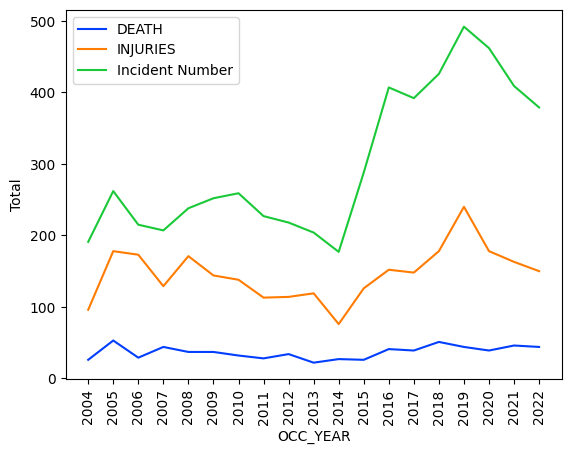

In [359]:
df12=df.groupby(["OCC_YEAR"])["DEATH"].sum().reset_index()
df12
ax=sns.lineplot(x="OCC_YEAR",y="DEATH",data=df12,label="DEATH")
ax.set_xticks(range(2004,2023))
plt.xticks(rotation=90)

sns.set_palette('deep')
df14=df.groupby(["OCC_YEAR"])["INJURIES"].sum().reset_index()
sns.lineplot(x="OCC_YEAR",y="INJURIES",data=df14,label="INJURIES")
plt.ylabel("Total")


df15=df7.groupby(["OCC_YEAR"])["AFFECTED_PEOPLE"].count().reset_index()
df15
sns.lineplot(x="OCC_YEAR",y="AFFECTED_PEOPLE",data=df15,label="Incident Number")
df5["AFFECTED_PEOPLE"]

plt.show()






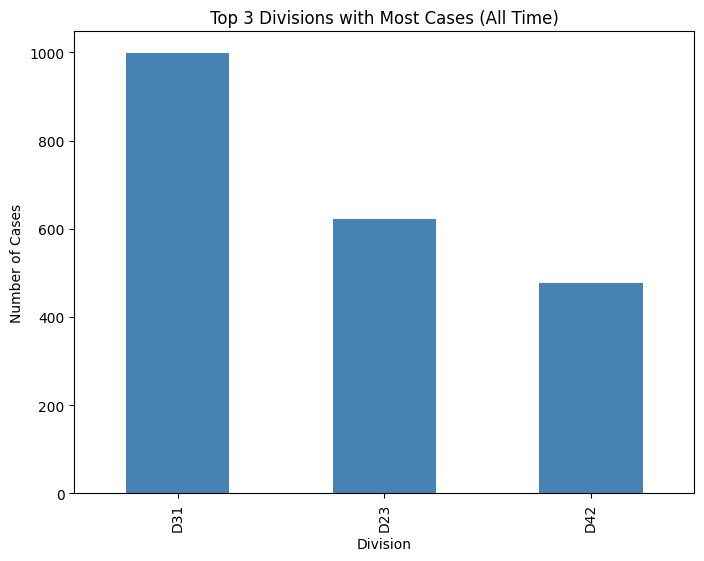

In [375]:
top_divisions_all_time = df7['DIVISION'].value_counts().nlargest(3)
plt.figure(figsize=(8, 6))
top_divisions_all_time.plot(kind='bar',color='steelblue')
plt.title('Top 3 Divisions with Most Cases (All Time)')
plt.xlabel('Division')
plt.ylabel('Number of Cases')



plt.show()

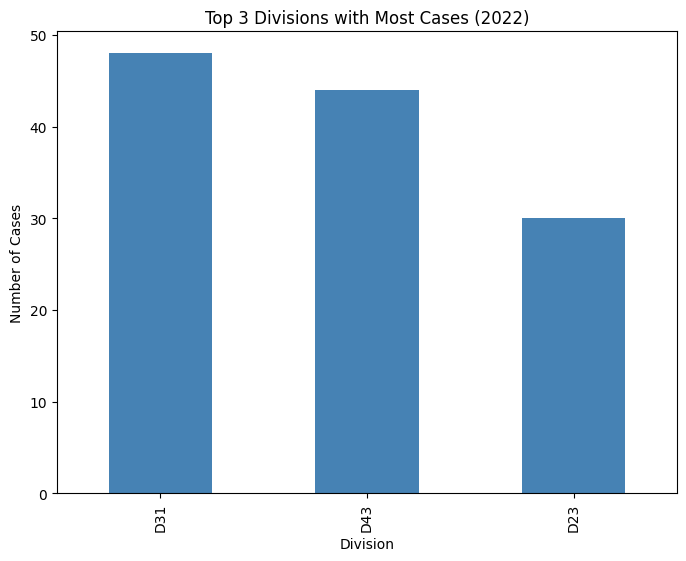

In [376]:
df_2022 = df7[df7['OCC_YEAR'] == 2022]
top_divisions_2022 = df_2022['DIVISION'].value_counts().nlargest(3)

plt.figure(figsize=(8, 6))
top_divisions_2022.plot(kind='bar',color='steelblue')
plt.title('Top 3 Divisions with Most Cases (2022)')
plt.xlabel('Division')
plt.ylabel('Number of Cases')
plt.show()

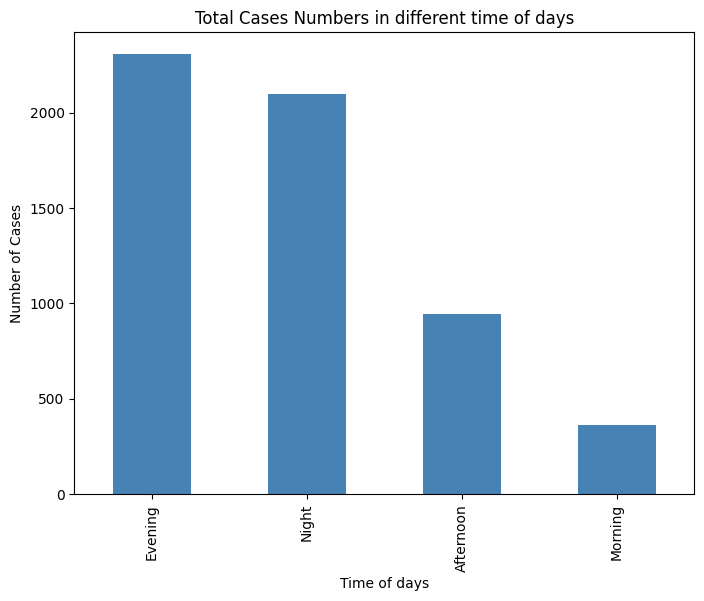

In [377]:
timeofdays_all_time = df7['OCC_TIME_RANGE'].value_counts()
plt.figure(figsize=(8, 6))
timeofdays_all_time.plot(kind='bar',color='steelblue')
plt.title('Total Cases Numbers in different time of days')
plt.xlabel('Time of days')
plt.ylabel('Number of Cases')
plt.show()

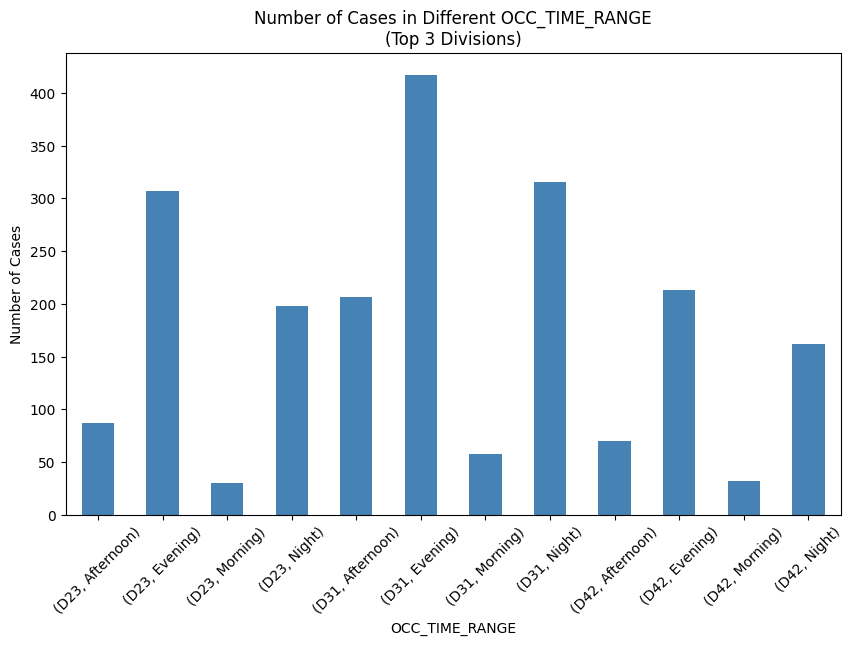

In [378]:
top_divisions = df7['DIVISION'].value_counts().nlargest(3).index

top_divisions_data = df7[df7['DIVISION'].isin(top_divisions)]

cases_by_time_range = top_divisions_data.groupby(['DIVISION','OCC_TIME_RANGE'])['DIVISION'].count()


plt.figure(figsize=(10, 6))
cases_by_time_range.plot(kind='bar',color='steelblue')
plt.title('Number of Cases in Different OCC_TIME_RANGE\n(Top 3 Divisions)')
plt.xlabel('OCC_TIME_RANGE')
plt.ylabel('Number of Cases')
plt.xticks(rotation=45)
plt.show()

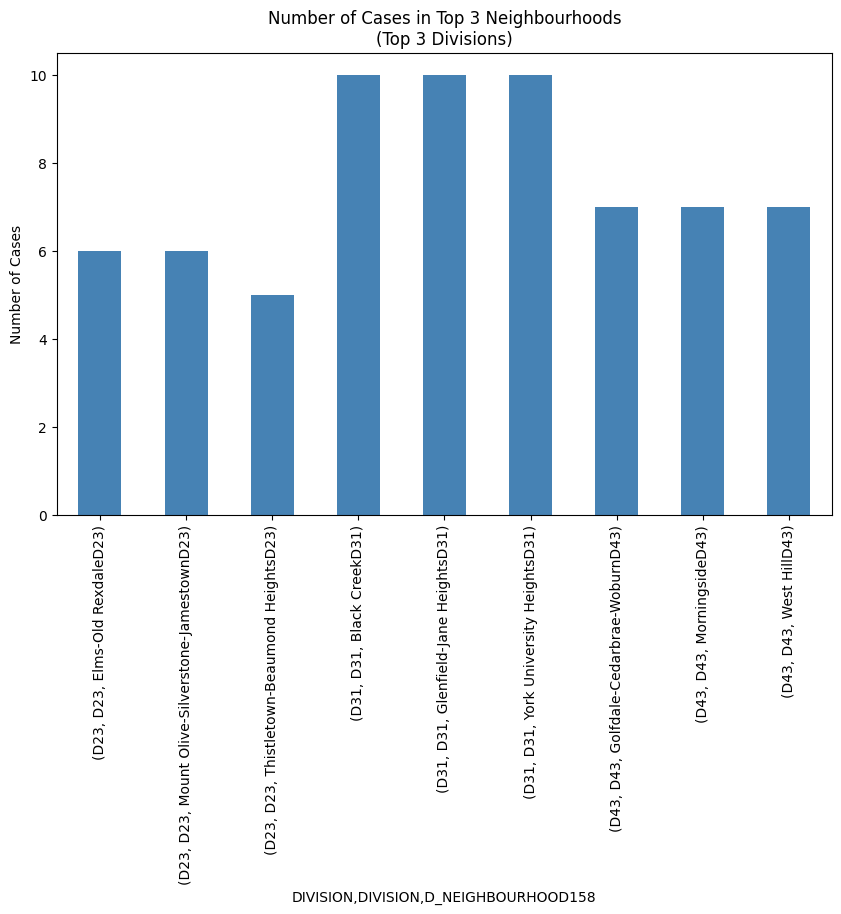

In [379]:
top_divisions_2022_name = df_2022['DIVISION'].value_counts().nlargest(3).index
top_divisions_2022_data = df_2022[df_2022['DIVISION'].isin(top_divisions_2022_name)]

top_neighbourhood_in_top_division = top_divisions_2022_data.groupby(['DIVISION','D_NEIGHBOURHOOD158']).size()

def select_top_neighbourhood(group):
    return group.nlargest(3)
top_neighbourhood_in_top_division = top_neighbourhood_in_top_division.groupby('DIVISION').apply(select_top_neighbourhood)
top_neighbourhood_in_top_division

plt.figure(figsize=(10, 6))
top_neighbourhood_in_top_division.plot(kind='bar',color='steelblue')
plt.title('Number of Cases in Top 3 Neighbourhoods\n(Top 3 Divisions)')

plt.ylabel('Number of Cases')

plt.show()




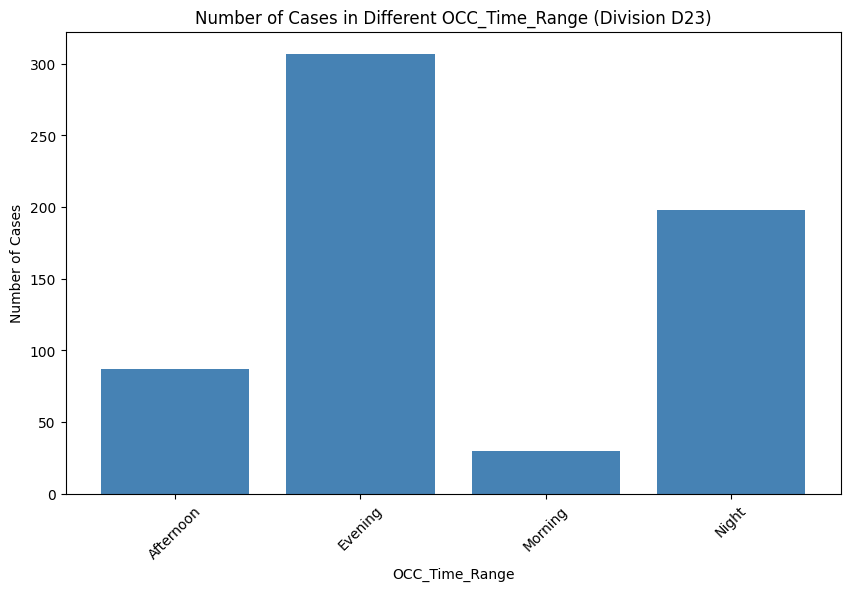

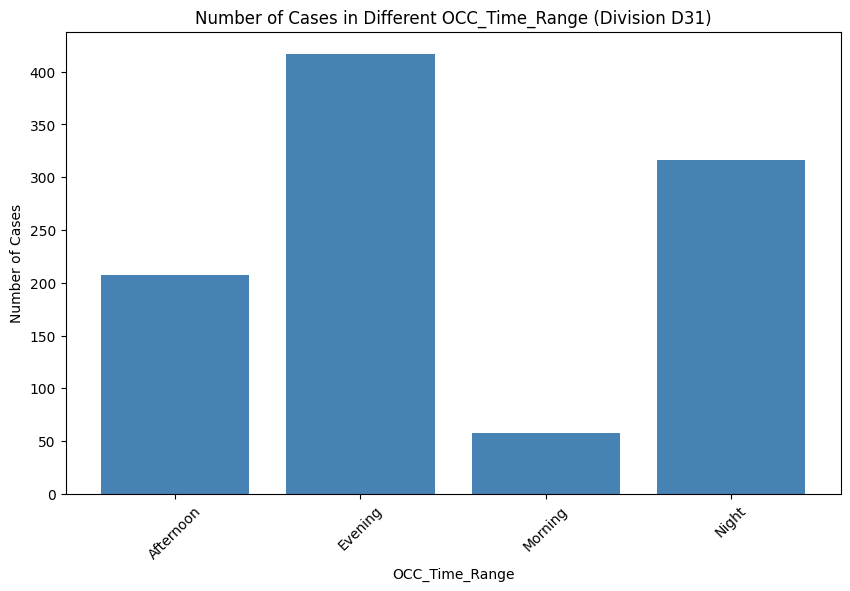

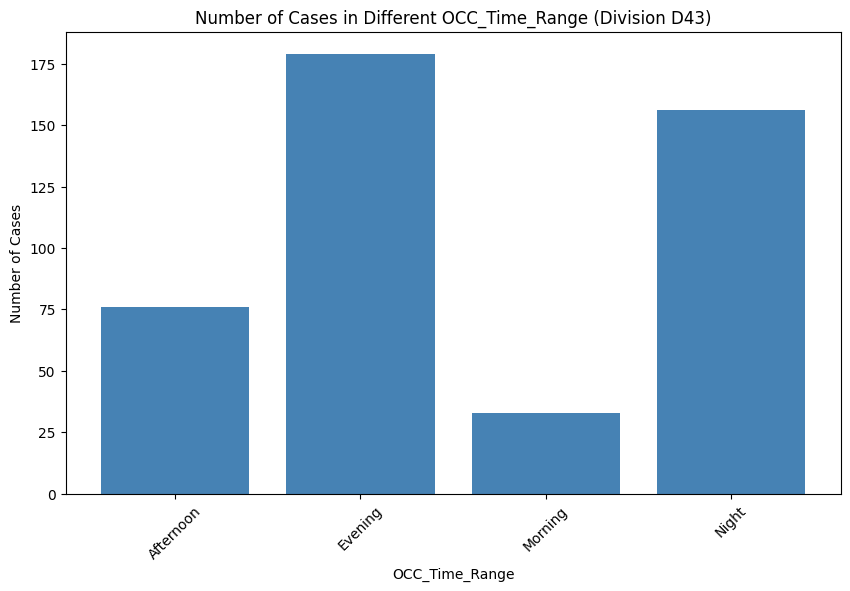

In [380]:
D23_31_43 = df7[df7['DIVISION'].isin(['D23', 'D31', 'D43'])]
D23_31_43_by_time_range = D23_31_43.groupby(['DIVISION', 'OCC_TIME_RANGE']).size().reset_index(name='CASES')
for division in ['D23', 'D31', 'D43']:
    division_data = D23_31_43_by_time_range[D23_31_43_by_time_range['DIVISION'] == division]
    
    plt.figure(figsize=(10, 6))
    plt.bar(division_data['OCC_TIME_RANGE'], division_data['CASES'],color='steelblue')
    plt.title(f'Number of Cases in Different OCC_Time_Range (Division {division})')
    plt.xlabel('OCC_Time_Range')
    plt.ylabel('Number of Cases')
    plt.xticks(rotation=45)
    plt.show()


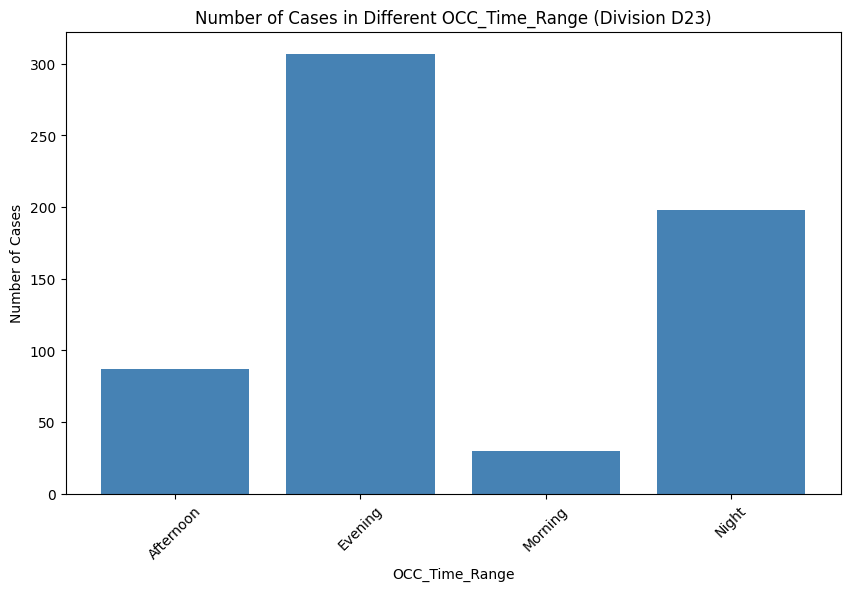

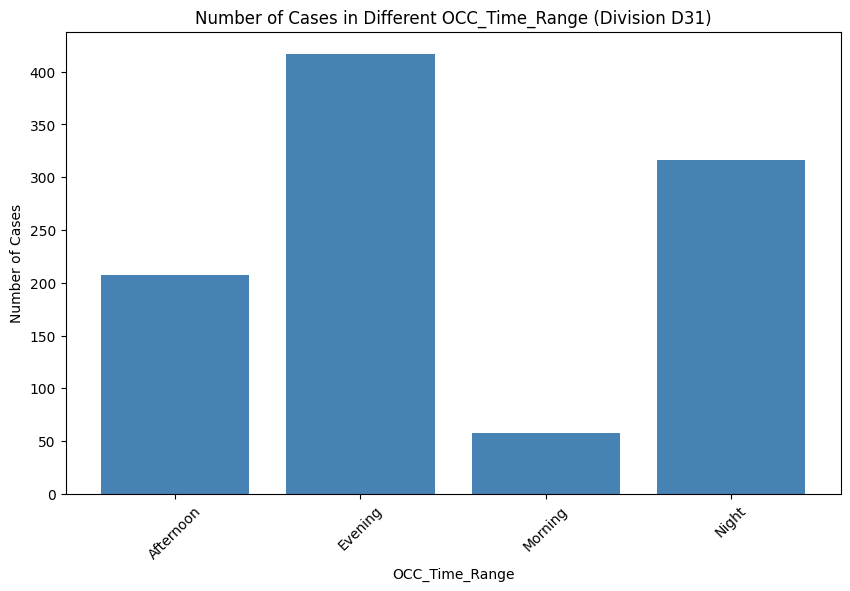

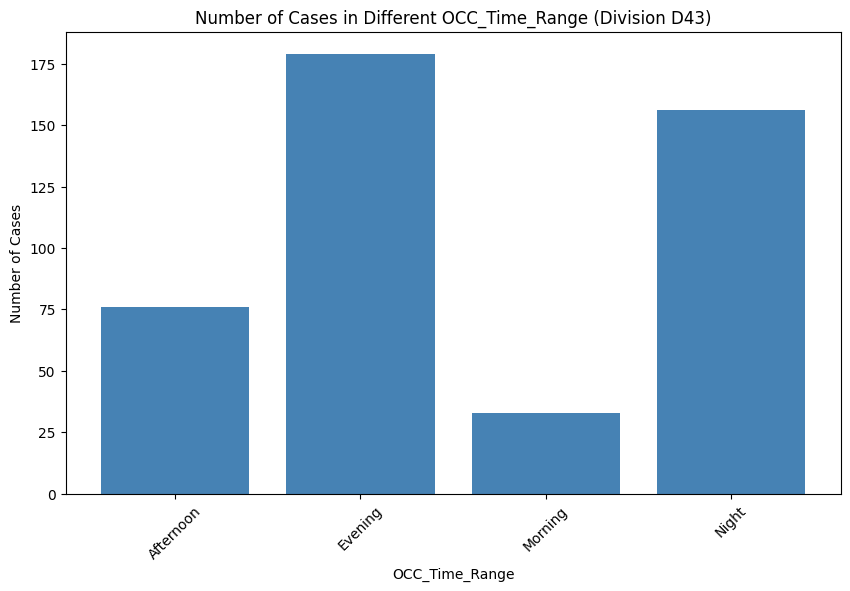

In [381]:
for division in ['D23', 'D31', 'D43']:
    division_data = D23_31_43_by_time_range[D23_31_43_by_time_range['DIVISION'] == division]
    
    plt.figure(figsize=(10, 6))
    plt.bar(division_data['OCC_TIME_RANGE'], division_data['CASES'],color='steelblue')
    plt.title(f'Number of Cases in Different OCC_Time_Range (Division {division})')
    plt.xlabel('OCC_Time_Range')
    plt.ylabel('Number of Cases')
    plt.xticks(rotation=45)
    plt.show()

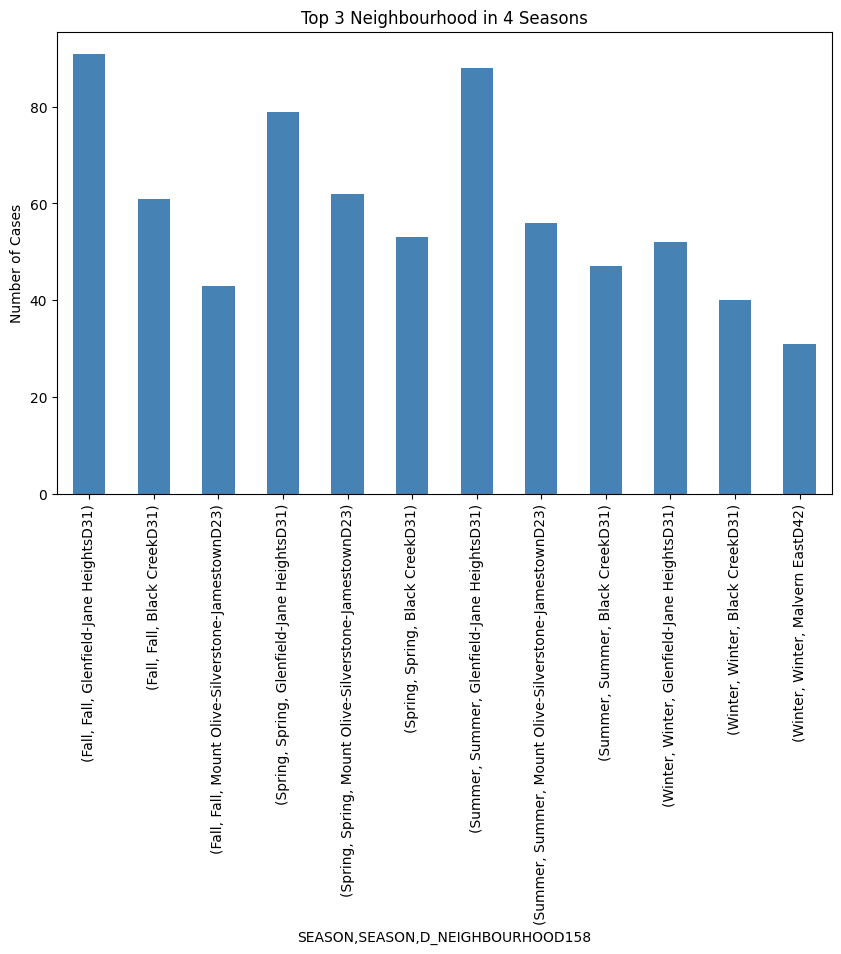

In [382]:
top_neighbourhoods = df7.groupby(['SEASON','D_NEIGHBOURHOOD158']).size()
def select_top3_neighbourhood(group):
    return group.nlargest(3)
top_neighbourhoods = top_neighbourhoods.groupby('SEASON').apply(select_top3_neighbourhood)


plt.figure(figsize=(10, 6))
top_neighbourhoods.plot(kind='bar',color='steelblue')
plt.title('Top 3 Neighbourhood in 4 Seasons')
plt.ylabel('Number of Cases')

plt.show()

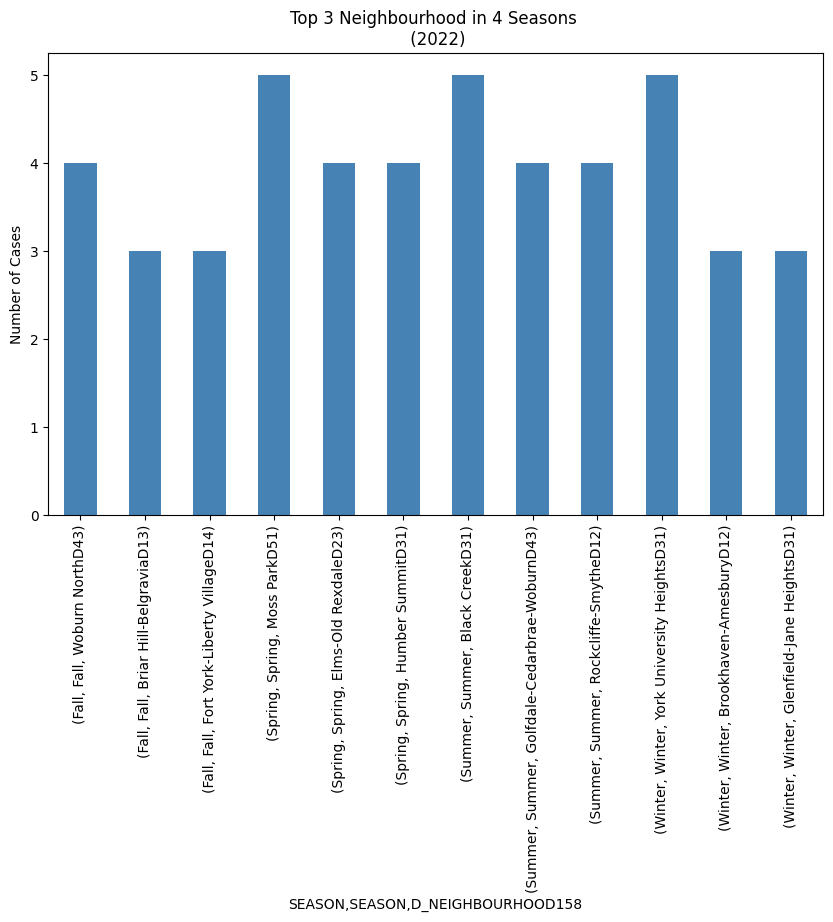

In [383]:
top_neighbourhoods_2022 = df_2022.groupby(['SEASON','D_NEIGHBOURHOOD158']).size()
def select_top3_neighbourhood(group):
    return group.nlargest(3)
top_neighbourhoods_2022 = top_neighbourhoods_2022.groupby('SEASON').apply(select_top3_neighbourhood)

sns.set_palette('bright')
plt.figure(figsize=(10, 6))
top_neighbourhoods_2022.plot(kind='bar',color='steelblue')
plt.title('Top 3 Neighbourhood in 4 Seasons \n (2022)')
plt.ylabel('Number of Cases')

plt.show()

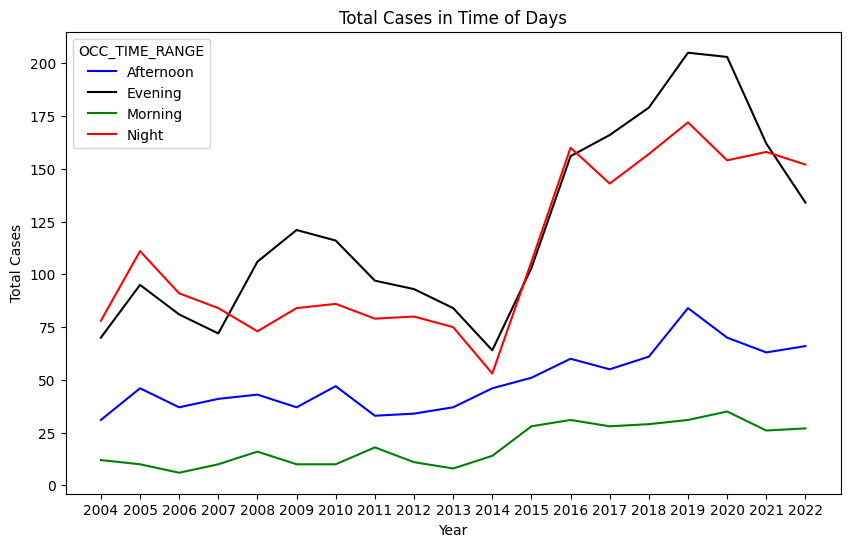

In [393]:
total_case_in_time_of_days= df7.groupby(['OCC_YEAR','OCC_TIME_RANGE']).size().reset_index(name='TOTAL')
plt.figure(figsize=(10, 6))
custom_palette = sns.color_palette(['blue', 'black', 'green', 'red'])

sns.lineplot(data=total_case_in_time_of_days,x=total_case_in_time_of_days['OCC_YEAR'],y=total_case_in_time_of_days['TOTAL'],hue=total_case_in_time_of_days['OCC_TIME_RANGE'],palette=custom_palette)
ax = plt.gca()
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
plt.title('Total Cases in Time of Days')
plt.xlabel('Year')
plt.ylabel('Total Cases')
plt.show()

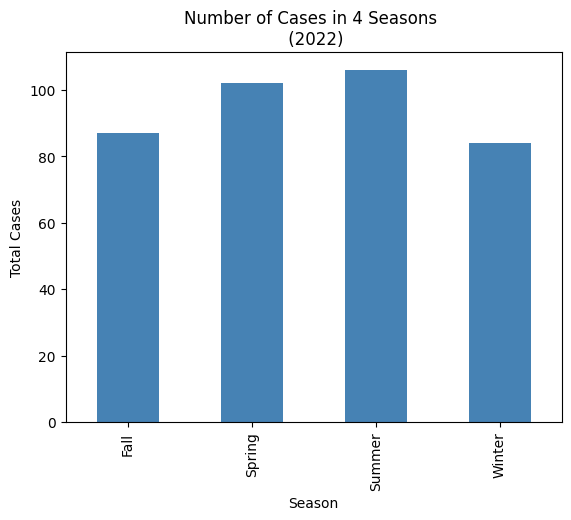

In [384]:
case_by_season = df_2022.groupby('SEASON').size()
sns.set_palette('bright')
case_by_season.plot(kind='bar',color='steelblue')

plt.title('Number of Cases in 4 Seasons \n (2022)')
plt.xlabel('Season')
plt.ylabel('Total Cases')
plt.show()


In [255]:
time_division = top_divisions_2022_data.groupby(['OCC_TIME_RANGE','DIVISION'])['DIVISION'].size().reset_index(name='cases_number')

time_division


,OCC_TIME_RANGE,DIVISION,cases_number
0,Afternoon,D23,5
1,Afternoon,D31,10
2,Afternoon,D43,12
3,Evening,D23,14
4,Evening,D31,16
5,Evening,D43,17
6,Morning,D23,1
7,Morning,D31,3
8,Morning,D43,2
9,Night,D23,10


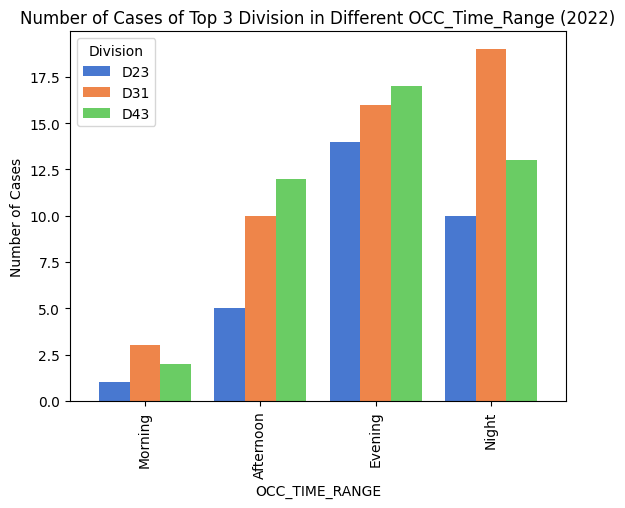

In [441]:
pivot_df = time_division.pivot(index='OCC_TIME_RANGE', columns='DIVISION', values='cases_number')
sns.set_palette('muted')
index_order = ['Morning', 'Afternoon', 'Evening','Night']
pivot_df = pivot_df.loc[index_order]

pivot_df.plot(kind='bar', width=0.8)
plt.xlabel('OCC_TIME_RANGE')
plt.ylabel('Number of Cases')
plt.title('Number of Cases of Top 3 Division in Different OCC_Time_Range (2022)')
plt.legend(title='Division')


In [257]:
data_2019_2022 = df7[(df7['OCC_YEAR'] == 2019) | (df7['OCC_YEAR'] == 2020)| (df7['OCC_YEAR'] == 2021)| (df7['OCC_YEAR'] == 2022)]


In [258]:
data_2019_2022_1 = data_2019_2022.groupby(['OCC_YEAR','OCC_TIME_RANGE']).size().reset_index(name='cases_number')

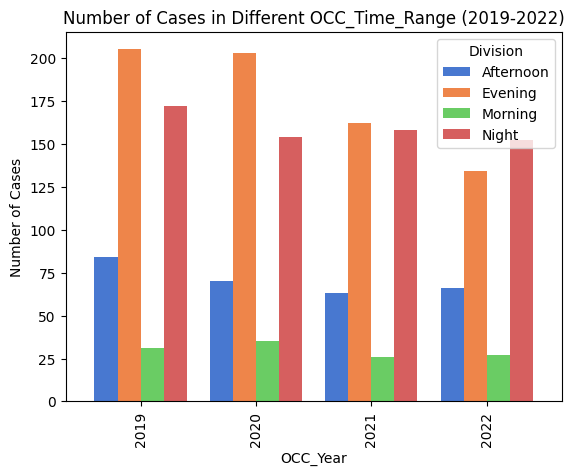

In [400]:
pivot_data_2019_2022_1 = data_2019_2022_1.pivot(index='OCC_YEAR', columns='OCC_TIME_RANGE', values='cases_number')

sns.set_palette('muted')
pivot_data_2019_2022_1.plot(kind='bar', width=0.8)
plt.xlabel('OCC_Year')
plt.ylabel('Number of Cases')
plt.title('Number of Cases in Different OCC_Time_Range (2019-2022)')
plt.legend(title='Division')


In [260]:
data_2019_2022_2 = data_2019_2022.groupby(['OCC_TIME_RANGE','OCC_YEAR']).size().reset_index(name='cases_number')

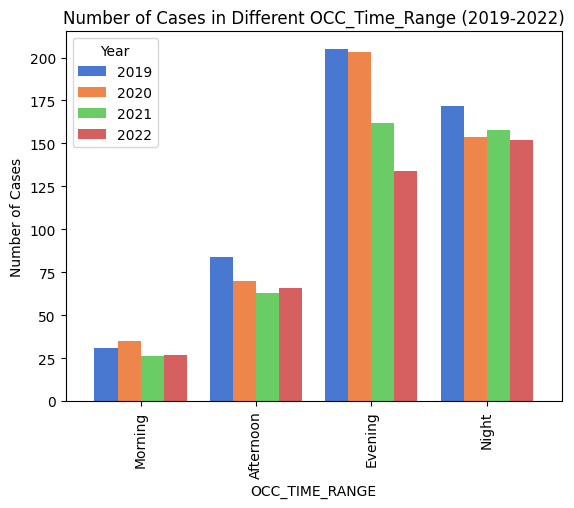

In [446]:
pivot_data_2019_2022_2 = data_2019_2022_2.pivot(index='OCC_TIME_RANGE', columns='OCC_YEAR', values='cases_number')

pivot_data_2019_2022_2=pivot_data_2019_2022_2.loc[index_order]
pivot_data_2019_2022_2.plot(kind='bar', width=0.8)
sns.set_palette('muted')
plt.xlabel('OCC_TIME_RANGE')
plt.ylabel('Number of Cases')
plt.title('Number of Cases in Different OCC_Time_Range (2019-2022)')
plt.legend(title='Year')


In [262]:
top_divisions_2022



DIVISION
D31    48
D43    44
D23    30
Name: count, dtype: int64

In [263]:
df_2020_2022 = df7[(df7['OCC_YEAR'] == 2020)| (df7['OCC_YEAR'] == 2021)| (df7['OCC_YEAR'] == 2022)]

In [264]:
df_top3_2020_2022 =  df_2020_2022[(df_2020_2022['DIVISION'] == 'D31')| (df_2020_2022['DIVISION'] == 'D43')| (df_2020_2022['DIVISION'] == 'D23')]

In [265]:
df_top3_2020_2022

,OCC_DATE,OCC_YEAR,OCC_MONTH,OCC_DOW,OCC_DOY,OCC_DAY,OCC_HOUR,OCC_TIME_RANGE,DIVISION,DEATH,INJURIES,HOOD_158,NEIGHBOURHOOD_158,HOOD_140,NEIGHBOURHOOD_140,D_NEIGHBOURHOOD158,AFFECTED_PEOPLE,SEASON
4465,2020/10/28 04:00:00+00,2020,October,Wednesday,302,28,23,Evening,D31,0,0,25,Glenfield-Jane Heights,25,Glenfield-Jane Heights (25),Glenfield-Jane HeightsD31,0,Fall
4468,2020/08/26 04:00:00+00,2020,August,Wednesday,239,26,18,Evening,D31,0,0,27,York University Heights,27,York University Heights (27),York University HeightsD31,0,Summer
4470,2020/01/27 05:00:00+00,2020,January,Monday,27,27,2,Night,D31,0,2,154,Oakdale-Beverley Heights,26,Downsview-Roding-CFB (26),Oakdale-Beverley HeightsD31,2,Winter
4472,2020/09/07 04:00:00+00,2020,September,Monday,251,7,3,Night,D43,0,0,140,Guildwood,140,Guildwood (140),GuildwoodD43,0,Fall
4475,2020/08/19 04:00:00+00,2020,August,Wednesday,232,19,18,Evening,D23,0,1,2,Mount Olive-Silverstone-Jamestown,2,Mount Olive-Silverstone-Jamestown (2),Mount Olive-Silverstone-JamestownD23,1,Summer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5690,2022/02/27 05:00:00+00,2022,February,Sunday,58,27,3,Night,D31,0,0,155,Downsview,26,Downsview-Roding-CFB (26),DownsviewD31,0,Winter
5692,2022/04/04 04:00:00+00,2022,April,Monday,94,4,19,Evening,D43,0,0,135,Morningside,135,Morningside (135),MorningsideD43,0,Spring
5697,2022/02/12 05:00:00+00,2022,February,Saturday,43,12,17,Afternoon,D23,0,0,21,Humber Summit,21,Humber Summit (21),Humber SummitD23,0,Winter
5700,2022/09/10 04:00:00+00,2022,September,Saturday,253,10,1,Night,D31,0,1,23,Pelmo Park-Humberlea,23,Pelmo Park-Humberlea (23),Pelmo Park-HumberleaD31,1,Fall


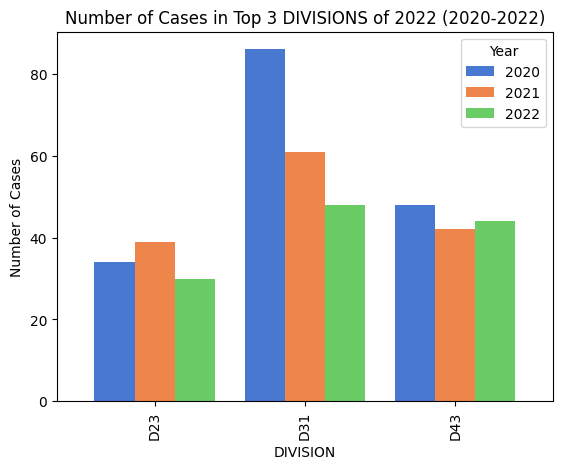

In [398]:
df_top3_2020_2022_new = df_top3_2020_2022.groupby(['DIVISION','OCC_YEAR']).size().reset_index(name='cases_number')
pivot_df_top3_2020_2022 = df_top3_2020_2022_new.pivot(index='DIVISION', columns='OCC_YEAR', values='cases_number')


pivot_df_top3_2020_2022.plot(kind='bar', width=0.8)
sns.set_palette('muted')
plt.xlabel('DIVISION')
plt.ylabel('Number of Cases')
plt.title('Number of Cases in Top 3 DIVISIONS of 2022 (2020-2022)')
plt.legend(title='Year')


In [342]:
pivot_df_top3_2020_2022

OCC_YEAR,2020,2021,2022
DIVISION,,,
D23,34,39,30
D31,86,61,48
D43,48,42,44


In [341]:
df_top3_2020_2022_new

,DIVISION,OCC_YEAR,cases_number
0,D23,2020,34
1,D23,2021,39
2,D23,2022,30
3,D31,2020,86
4,D31,2021,61
5,D31,2022,48
6,D43,2020,48
7,D43,2021,42
8,D43,2022,44


In [267]:
df_top3_2020_2022_new =df_top3_2020_2022.groupby(['DIVISION','OCC_YEAR']).size().reset_index(name='cases_number')
df_top3_2020_2022_new

,DIVISION,OCC_YEAR,cases_number
0,D23,2020,34
1,D23,2021,39
2,D23,2022,30
3,D31,2020,86
4,D31,2021,61
5,D31,2022,48
6,D43,2020,48
7,D43,2021,42
8,D43,2022,44


In [268]:
df_2019_2022 = df7[(df7['OCC_YEAR'] == 2019)|(df7['OCC_YEAR'] == 2020)| (df7['OCC_YEAR'] == 2021)| (df7['OCC_YEAR'] == 2022)]

In [269]:
import scipy.signal as signal


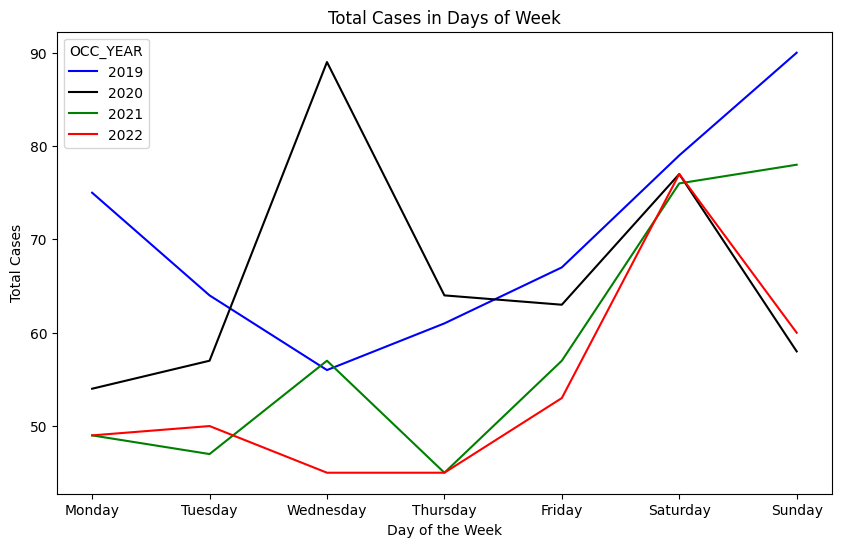

In [477]:
dow_2019_2022= df_2019_2022.groupby(['OCC_DOW','OCC_YEAR']).size().reset_index(name='TOTAL')
order_dow = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
dow_2019_2022['OCC_DOW'] = pd.Categorical(dow_2019_2022['OCC_DOW'], categories=order_dow, ordered=True)
dow_2019_2022.sort_values('OCC_DOW', inplace=True)

plt.figure(figsize=(10, 6))
custom_palette = sns.color_palette(['blue', 'black', 'green', 'red'])
sns.lineplot(data=dow_2019_2022, x='OCC_DOW', y='TOTAL', hue='OCC_YEAR', palette=custom_palette)
ax = plt.gca()
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
plt.title('Total Cases in Days of Week')
plt.xlabel('Day of the Week')
plt.ylabel('Total Cases')


plt.show()

In [271]:
df7

,OCC_DATE,OCC_YEAR,OCC_MONTH,OCC_DOW,OCC_DOY,OCC_DAY,OCC_HOUR,OCC_TIME_RANGE,DIVISION,DEATH,INJURIES,HOOD_158,NEIGHBOURHOOD_158,HOOD_140,NEIGHBOURHOOD_140,D_NEIGHBOURHOOD158,AFFECTED_PEOPLE,SEASON
0,2004/05/15 04:00:00+00,2004,May,Saturday,136,15,1,Night,D41,0,0,142,Woburn North,137,Woburn (137),Woburn NorthD41,0,Spring
1,2004/07/26 04:00:00+00,2004,July,Monday,208,26,23,Evening,D23,0,0,1,West Humber-Clairville,1,West Humber-Clairville (1),West Humber-ClairvilleD23,0,Summer
2,2004/05/14 04:00:00+00,2004,May,Friday,135,14,16,Afternoon,D31,1,1,24,Black Creek,24,Black Creek (24),Black CreekD31,2,Spring
3,2004/12/19 05:00:00+00,2004,December,Sunday,354,19,0,Night,D51,1,0,168,Downtown Yonge East,75,Church-Yonge Corridor (75),Downtown Yonge EastD51,1,Winter
4,2004/04/12 04:00:00+00,2004,April,Monday,103,12,22,Evening,D42,0,0,146,Malvern East,132,Malvern (132),Malvern EastD42,0,Spring
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5702,2022/06/02 04:00:00+00,2022,June,Thursday,153,2,3,Night,D33,0,1,53,Henry Farm,53,Henry Farm (53),Henry FarmD33,1,Summer
5703,2022/07/17 04:00:00+00,2022,July,Sunday,198,17,3,Night,D14,1,1,164,Wellington Place,77,Waterfront Communities-The Island (77),Wellington PlaceD14,2,Summer
5704,2022/02/21 05:00:00+00,2022,February,Monday,52,21,5,Night,D43,0,0,135,Morningside,135,Morningside (135),MorningsideD43,0,Winter
5705,2022/09/11 04:00:00+00,2022,September,Sunday,254,11,1,Night,D11,0,2,83,Dufferin Grove,83,Dufferin Grove (83),Dufferin GroveD11,2,Fall


In [272]:
bubble = df7.groupby('OCC_YEAR').agg(count=('AFFECTED_PEOPLE', 'count'), total_sum=('AFFECTED_PEOPLE', 'sum')).reset_index()

In [273]:
bubble

,OCC_YEAR,count,total_sum
0,2004,191,122
1,2005,262,231
2,2006,215,202
3,2007,207,173
4,2008,238,208
5,2009,252,181
6,2010,259,170
7,2011,227,141
8,2012,218,122
9,2013,204,141


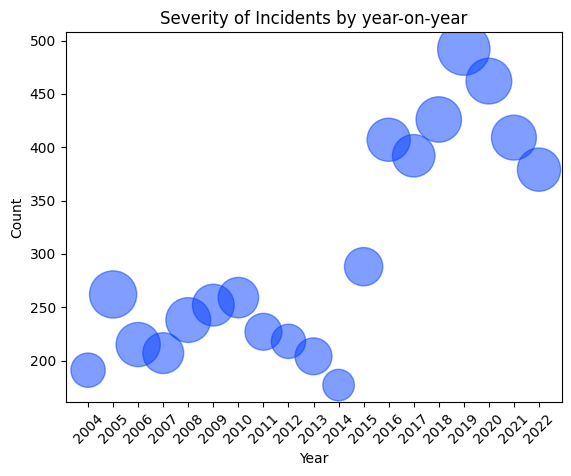

In [358]:
plt.scatter(bubble['OCC_YEAR'], bubble['count'], s=bubble['total_sum']*5, alpha=0.5)
plt.xticks(bubble['OCC_YEAR'],rotation=45)
sns.set_palette('bright')
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Severity of Incidents by year-on-year')


plt.show()

In [308]:
df_2019_2022_D31 = df_2019_2022[df_2019_2022['DIVISION']=='D31']


In [309]:
df_2019_2022_D31

,OCC_DATE,OCC_YEAR,OCC_MONTH,OCC_DOW,OCC_DOY,OCC_DAY,OCC_HOUR,OCC_TIME_RANGE,DIVISION,DEATH,INJURIES,HOOD_158,NEIGHBOURHOOD_158,HOOD_140,NEIGHBOURHOOD_140,D_NEIGHBOURHOOD158,AFFECTED_PEOPLE,SEASON
3976,2019/02/07 05:00:00+00,2019,February,Thursday,38,7,15,Afternoon,D31,0,0,155,Downsview,26,Downsview-Roding-CFB (26),DownsviewD31,0,Winter
3979,2019/08/05 04:00:00+00,2019,August,Monday,217,5,6,Morning,D31,0,4,27,York University Heights,27,York University Heights (27),York University HeightsD31,4,Summer
3990,2019/12/16 05:00:00+00,2019,December,Monday,350,16,22,Evening,D31,0,1,25,Glenfield-Jane Heights,25,Glenfield-Jane Heights (25),Glenfield-Jane HeightsD31,1,Winter
4004,2019/04/18 04:00:00+00,2019,April,Thursday,108,18,0,Night,D31,0,1,25,Glenfield-Jane Heights,25,Glenfield-Jane Heights (25),Glenfield-Jane HeightsD31,1,Spring
4011,2019/08/02 04:00:00+00,2019,August,Friday,214,2,0,Night,D31,0,1,25,Glenfield-Jane Heights,25,Glenfield-Jane Heights (25),Glenfield-Jane HeightsD31,1,Summer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5673,2022/10/23 04:00:00+00,2022,October,Sunday,296,23,4,Night,D31,0,1,24,Black Creek,24,Black Creek (24),Black CreekD31,1,Fall
5682,2022/03/19 04:00:00+00,2022,March,Saturday,78,19,13,Afternoon,D31,0,0,25,Glenfield-Jane Heights,25,Glenfield-Jane Heights (25),Glenfield-Jane HeightsD31,0,Spring
5689,2022/01/26 05:00:00+00,2022,January,Wednesday,26,26,0,Night,D31,0,0,27,York University Heights,27,York University Heights (27),York University HeightsD31,0,Winter
5690,2022/02/27 05:00:00+00,2022,February,Sunday,58,27,3,Night,D31,0,0,155,Downsview,26,Downsview-Roding-CFB (26),DownsviewD31,0,Winter


In [331]:
df_2019_2022_top_3_neighbourhood = df_2019_2022_D31.groupby('NEIGHBOURHOOD_158').size().nlargest(3).index

In [343]:
df_2019_2022_top_3_neighbourhood_data = df_2019_2022_D31[df_2019_2022_D31['NEIGHBOURHOOD_158'].isin(df_2019_2022_top_3_neighbourhood)]
df_2019_2022_top_3_neighbourhood_data= df_2019_2022_top_3_neighbourhood_data.groupby(['NEIGHBOURHOOD_158','OCC_YEAR']).size()
df_2019_2022_top_3_neighbourhood_data=df_2019_2022_top_3_neighbourhood_data.reset_index(name='cases_number')

In [346]:
df_2019_2022_top_3_neighbourhood_data_pivot=df_2019_2022_top_3_neighbourhood_data.pivot(index='NEIGHBOURHOOD_158', columns='OCC_YEAR', values='cases_number')

<Figure size 1000x600 with 0 Axes>

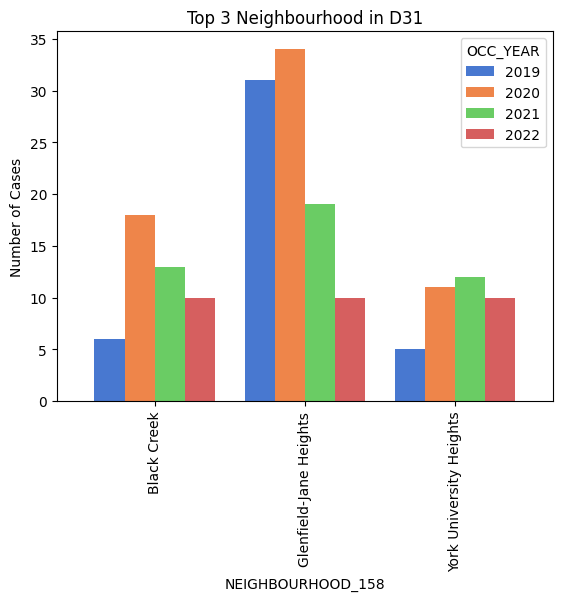

In [452]:


plt.figure(figsize=(10, 6))
df_2019_2022_top_3_neighbourhood_data_pivot.plot(kind='bar',width=0.8)
plt.title('Top 3 Neighbourhood in D31')
plt.ylabel('Number of Cases')
sns.set_palette('muted')
plt.show()

In [476]:
df_2019_2022_top_3_neighbourhood_data_pivot

OCC_YEAR,2019,2020,2021,2022
NEIGHBOURHOOD_158,,,,
Black Creek,6,18,13,10
Glenfield-Jane Heights,31,34,19,10
York University Heights,5,11,12,10


<Figure size 1000x600 with 0 Axes>

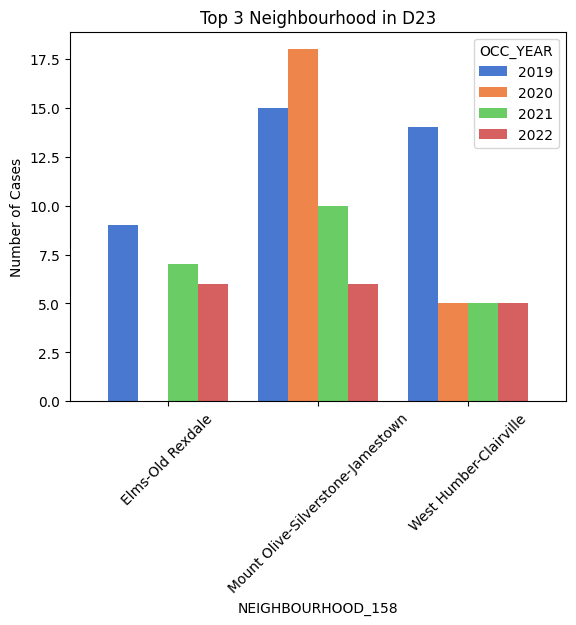

In [453]:
df_2019_2022_D23 = df_2019_2022[df_2019_2022['DIVISION']=='D23']
df_2019_2022_top_3_neighbourhood_D23 = df_2019_2022_D23.groupby('NEIGHBOURHOOD_158').size().nlargest(3).index
df_2019_2022_top_3_neighbourhood_D23_data = df_2019_2022_D23[df_2019_2022_D23['NEIGHBOURHOOD_158'].isin(df_2019_2022_top_3_neighbourhood_D23)]
df_2019_2022_top_3_neighbourhood_D23_data= df_2019_2022_top_3_neighbourhood_D23_data.groupby(['NEIGHBOURHOOD_158','OCC_YEAR']).size()
df_2019_2022_top_3_neighbourhood_D23_data=df_2019_2022_top_3_neighbourhood_D23_data.reset_index(name='cases_number')
df_2019_2022_top_3_neighbourhood_D23_data_pivot=df_2019_2022_top_3_neighbourhood_D23_data.pivot(index='NEIGHBOURHOOD_158', columns='OCC_YEAR', values='cases_number')
plt.figure(figsize=(10, 6))
df_2019_2022_top_3_neighbourhood_D23_data_pivot.plot(kind='bar',width=0.8)
plt.title('Top 3 Neighbourhood in D23')
plt.ylabel('Number of Cases')
sns.set_palette('muted')
plt.xticks(rotation=45)
plt.show()

<Figure size 1000x600 with 0 Axes>

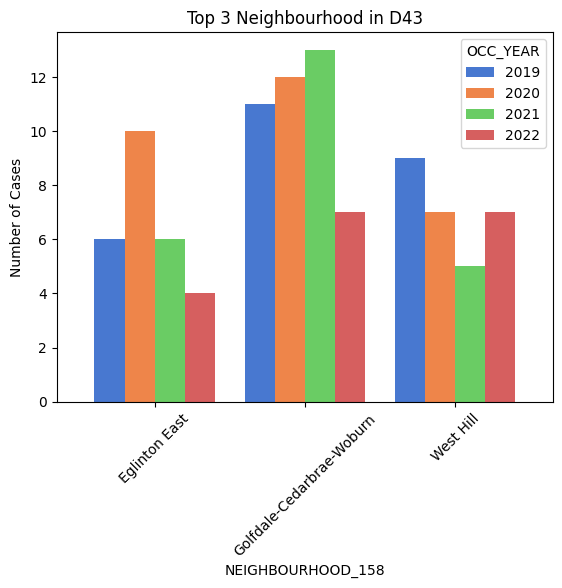

In [454]:
df_2019_2022_D43 = df_2019_2022[df_2019_2022['DIVISION']=='D43']
df_2019_2022_top_3_neighbourhood_D43 = df_2019_2022_D43.groupby('NEIGHBOURHOOD_158').size().nlargest(3).index
df_2019_2022_top_3_neighbourhood_D43_data = df_2019_2022_D43[df_2019_2022_D43['NEIGHBOURHOOD_158'].isin(df_2019_2022_top_3_neighbourhood_D43)]
df_2019_2022_top_3_neighbourhood_D43_data= df_2019_2022_top_3_neighbourhood_D43_data.groupby(['NEIGHBOURHOOD_158','OCC_YEAR']).size()
df_2019_2022_top_3_neighbourhood_D43_data=df_2019_2022_top_3_neighbourhood_D43_data.reset_index(name='cases_number')
df_2019_2022_top_3_neighbourhood_D43_data_pivot=df_2019_2022_top_3_neighbourhood_D43_data.pivot(index='NEIGHBOURHOOD_158', columns='OCC_YEAR', values='cases_number')
plt.figure(figsize=(10, 6))
df_2019_2022_top_3_neighbourhood_D43_data_pivot.plot(kind='bar',width=0.8)
plt.title('Top 3 Neighbourhood in D43')
plt.ylabel('Number of Cases')
sns.set_palette('muted')
plt.xticks(rotation=45)
plt.show()

In [ ]:
df_2019_2022_top_3_neighbourhood_data_pivot=df_2019_2022_top_3_neighbourhood_data.pivot(index='NEIGHBOURHOOD_158', columns='OCC_YEAR', values='cases_number')

In [307]:
df_2019_2022

,OCC_DATE,OCC_YEAR,OCC_MONTH,OCC_DOW,OCC_DOY,OCC_DAY,OCC_HOUR,OCC_TIME_RANGE,DIVISION,DEATH,INJURIES,HOOD_158,NEIGHBOURHOOD_158,HOOD_140,NEIGHBOURHOOD_140,D_NEIGHBOURHOOD158,AFFECTED_PEOPLE,SEASON
3965,2019/06/14 04:00:00+00,2019,June,Friday,165,14,21,Evening,D14,0,0,165,Harbourfront-CityPlace,77,Waterfront Communities-The Island (77),Harbourfront-CityPlaceD14,0,Summer
3966,2019/04/02 04:00:00+00,2019,April,Tuesday,92,2,13,Afternoon,D42,0,0,144,Morningside Heights,131,Rouge (131),Morningside HeightsD42,0,Spring
3967,2019/08/07 04:00:00+00,2019,August,Wednesday,219,7,15,Afternoon,D54,0,2,44,Flemingdon Park,44,Flemingdon Park (44),Flemingdon ParkD54,2,Summer
3968,2019/10/22 04:00:00+00,2019,October,Tuesday,295,22,23,Evening,D23,0,1,8,Humber Heights-Westmount,8,Humber Heights-Westmount (8),Humber Heights-WestmountD23,1,Fall
3969,2019/08/04 04:00:00+00,2019,August,Sunday,216,4,3,Night,D14,0,0,85,South Parkdale,85,South Parkdale (85),South ParkdaleD14,0,Summer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5702,2022/06/02 04:00:00+00,2022,June,Thursday,153,2,3,Night,D33,0,1,53,Henry Farm,53,Henry Farm (53),Henry FarmD33,1,Summer
5703,2022/07/17 04:00:00+00,2022,July,Sunday,198,17,3,Night,D14,1,1,164,Wellington Place,77,Waterfront Communities-The Island (77),Wellington PlaceD14,2,Summer
5704,2022/02/21 05:00:00+00,2022,February,Monday,52,21,5,Night,D43,0,0,135,Morningside,135,Morningside (135),MorningsideD43,0,Winter
5705,2022/09/11 04:00:00+00,2022,September,Sunday,254,11,1,Night,D11,0,2,83,Dufferin Grove,83,Dufferin Grove (83),Dufferin GroveD11,2,Fall


In [425]:
df_2019= df7[df7['OCC_YEAR']==2019]
df_2020= df7[df7['OCC_YEAR']==2020]
df_2021= df7[df7['OCC_YEAR']==2021]
df_2022= df7[df7['OCC_YEAR']==2022]

labels = ['1-10', '11-20', '21-31']
df_2019['OCC_DAY_CATEGORY'] = pd.cut(df_2019['OCC_DAY'], bins=[1, 11, 21, 32], labels=labels, right=False)
df_2020['OCC_DAY_CATEGORY'] = pd.cut(df_2020['OCC_DAY'], bins=[1, 11, 21, 32], labels=labels, right=False)
df_2021['OCC_DAY_CATEGORY'] = pd.cut(df_2021['OCC_DAY'], bins=[1, 11, 21, 32], labels=labels, right=False)
df_2022['OCC_DAY_CATEGORY'] = pd.cut(df_2022['OCC_DAY'], bins=[1, 11, 21, 32], labels=labels, right=False)

/var/folders/29/6qxt2m7565jgfhn52t3pr1hh0000gn/T/ipykernel_29041/3378418438.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2019['OCC_DAY_CATEGORY'] = pd.cut(df_2019['OCC_DAY'], bins=[1, 11, 21, 32], labels=labels, right=False)
/var/folders/29/6qxt2m7565jgfhn52t3pr1hh0000gn/T/ipykernel_29041/3378418438.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2020['OCC_DAY_CATEGORY'] = pd.cut(df_2020['OCC_DAY'], bins=[1, 11, 21, 32], labels=labels, right=False)
/var/folders/29/6qxt2m7565jgfhn52t3pr1hh00

In [426]:
df_2019_data=df_2019.groupby('OCC_DAY_CATEGORY').size()
df_2019_data
df_2020_data=df_2020.groupby('OCC_DAY_CATEGORY').size()

df_2021_data=df_2021.groupby('OCC_DAY_CATEGORY').size()

df_2022_data=df_2022.groupby('OCC_DAY_CATEGORY').size()
df_2022_data

OCC_DAY_CATEGORY
1-10     121
11-20    128
21-31    130
dtype: int64

In [427]:
df_2020_data

OCC_DAY_CATEGORY
1-10     155
11-20    141
21-31    166
dtype: int64

In [428]:
df_2021_data

OCC_DAY_CATEGORY
1-10     120
11-20    147
21-31    142
dtype: int64

In [429]:
df_2022_data

OCC_DAY_CATEGORY
1-10     121
11-20    128
21-31    130
dtype: int64

In [433]:
merged_df = pd.concat([df_2019_data, df_2020_data,df_2021_data,df_2022_data],axis=1)

In [435]:
merged_df.columns = ['2019', '2020', '2021', '2022']

In [437]:
merged_df

,2019,2020,2021,2022
OCC_DAY_CATEGORY,,,,
1-10,178,155,120,121
11-20,162,141,147,128
21-31,152,166,142,130


In [459]:
df7

,OCC_DATE,OCC_YEAR,OCC_MONTH,OCC_DOW,OCC_DOY,OCC_DAY,OCC_HOUR,OCC_TIME_RANGE,DIVISION,DEATH,INJURIES,HOOD_158,NEIGHBOURHOOD_158,HOOD_140,NEIGHBOURHOOD_140,D_NEIGHBOURHOOD158,AFFECTED_PEOPLE,SEASON,YearMonth
0,2004-05-15 04:00:00+00:00,2004,May,Saturday,136,15,1,Night,D41,0,0,142,Woburn North,137,Woburn (137),Woburn NorthD41,0,Spring,2004-05
1,2004-07-26 04:00:00+00:00,2004,July,Monday,208,26,23,Evening,D23,0,0,1,West Humber-Clairville,1,West Humber-Clairville (1),West Humber-ClairvilleD23,0,Summer,2004-07
2,2004-05-14 04:00:00+00:00,2004,May,Friday,135,14,16,Afternoon,D31,1,1,24,Black Creek,24,Black Creek (24),Black CreekD31,2,Spring,2004-05
3,2004-12-19 05:00:00+00:00,2004,December,Sunday,354,19,0,Night,D51,1,0,168,Downtown Yonge East,75,Church-Yonge Corridor (75),Downtown Yonge EastD51,1,Winter,2004-12
4,2004-04-12 04:00:00+00:00,2004,April,Monday,103,12,22,Evening,D42,0,0,146,Malvern East,132,Malvern (132),Malvern EastD42,0,Spring,2004-04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5702,2022-06-02 04:00:00+00:00,2022,June,Thursday,153,2,3,Night,D33,0,1,53,Henry Farm,53,Henry Farm (53),Henry FarmD33,1,Summer,2022-06
5703,2022-07-17 04:00:00+00:00,2022,July,Sunday,198,17,3,Night,D14,1,1,164,Wellington Place,77,Waterfront Communities-The Island (77),Wellington PlaceD14,2,Summer,2022-07
5704,2022-02-21 05:00:00+00:00,2022,February,Monday,52,21,5,Night,D43,0,0,135,Morningside,135,Morningside (135),MorningsideD43,0,Winter,2022-02
5705,2022-09-11 04:00:00+00:00,2022,September,Sunday,254,11,1,Night,D11,0,2,83,Dufferin Grove,83,Dufferin Grove (83),Dufferin GroveD11,2,Fall,2022-09


In [460]:
pivot_df7 = df7.pivot_table(index='DIVISION',columns ='SEASON',values='AFFECTED_PEOPLE',aggfunc='sum', fill_value=0 )
pivot_df7

SEASON,Fall,Spring,Summer,Winter
DIVISION,,,,
D11,15,32,20,16
D12,83,49,102,44
D13,43,17,28,31
D14,77,32,87,50
D22,27,36,39,28
D23,101,96,92,77
D31,170,124,155,122
D32,41,44,58,41
D33,29,25,26,18


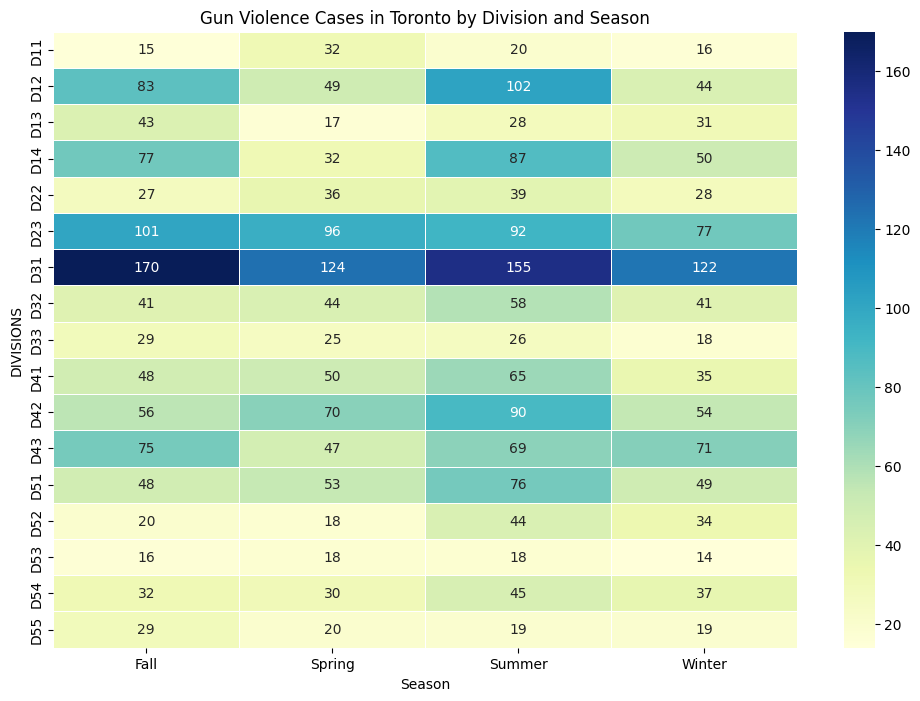

In [462]:
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_df7, cmap='YlGnBu', annot=True, fmt='d', linewidths=0.5)
plt.title('Gun Violence Cases in Toronto by Division and Season')
plt.xlabel('Season')
plt.ylabel('DIVISIONS')
plt.show()

In [470]:
pivot_df_2022 = df_2022.pivot_table(index='DIVISION',columns ='SEASON',values='AFFECTED_PEOPLE',aggfunc='sum', fill_value=0 )
pivot_df_2022

SEASON,Fall,Spring,Summer,Winter
DIVISION,,,,
D11,2,2,2,1
D12,3,2,4,4
D13,1,0,3,0
D14,13,1,4,1
D22,2,0,2,5
D23,2,4,5,2
D31,6,4,2,6
D32,6,0,3,4
D33,2,4,3,0


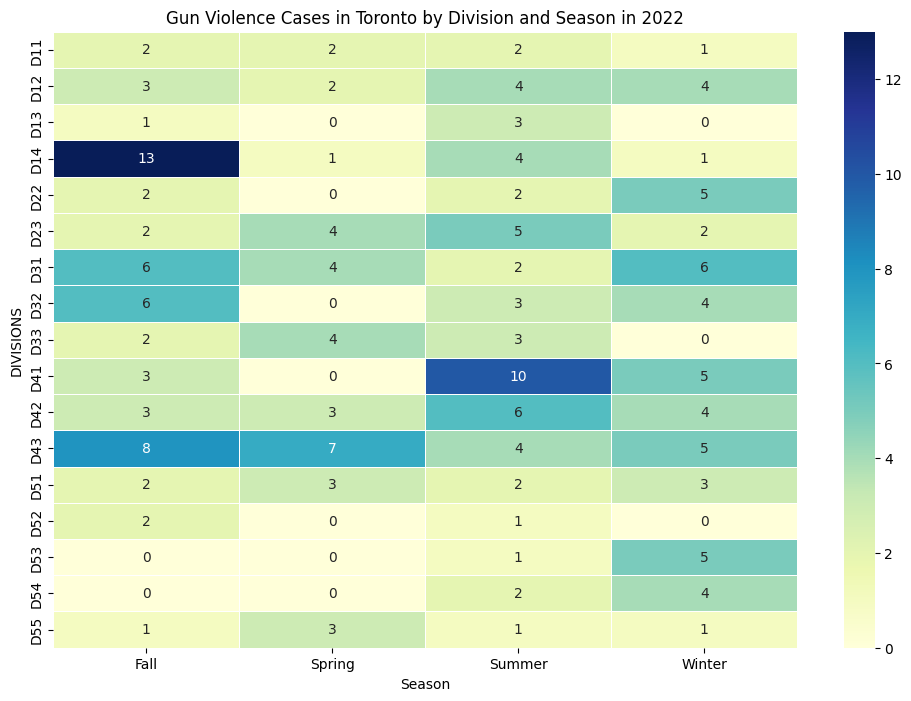

In [475]:
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_df_2022, cmap='YlGnBu', annot=True, fmt='d', linewidths=0.5)
plt.title('Gun Violence Cases in Toronto by Division and Season in 2022')
plt.xlabel('Season')
plt.ylabel('DIVISIONS')
plt.show()

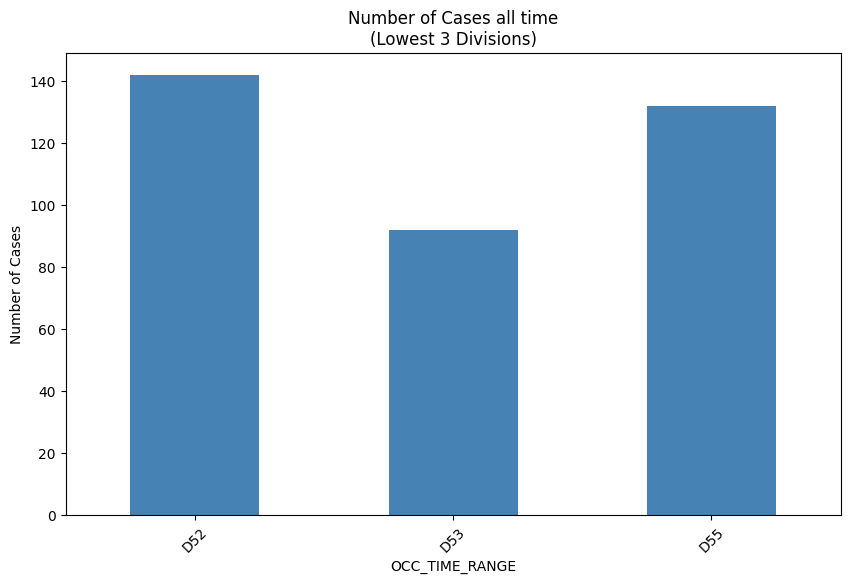

In [467]:
low_divisions = df7['DIVISION'].value_counts().nsmallest(3).index

low_divisions_data = df7[df7['DIVISION'].isin(low_divisions)]

low_divisions_data= low_divisions_data.groupby('DIVISION').size()

plt.figure(figsize=(10, 6))
low_divisions_data.plot(kind='bar',color='steelblue')
plt.title('Number of Cases all time\n(Lowest 3 Divisions)')
plt.xlabel('OCC_TIME_RANGE')
plt.ylabel('Number of Cases')
plt.xticks(rotation=45)
plt.show()

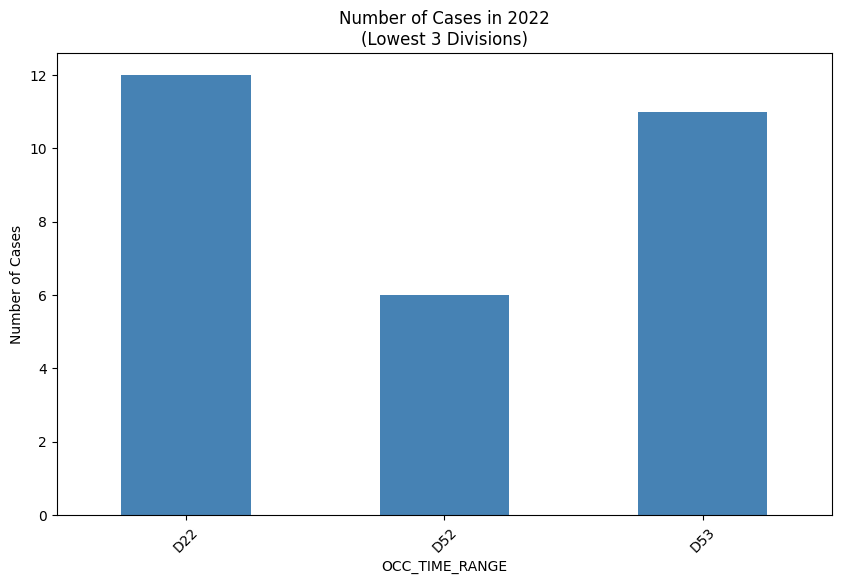

In [469]:
low_divisions_2022 = df_2022['DIVISION'].value_counts().nsmallest(3).index

low_divisions_data_2022 = df_2022[df_2022['DIVISION'].isin(low_divisions_2022)]

low_divisions_data_2022 = low_divisions_data_2022.groupby('DIVISION').size()

plt.figure(figsize=(10, 6))
low_divisions_data_2022.plot(kind='bar',color='steelblue')
plt.title('Number of Cases in 2022\n(Lowest 3 Divisions)')
plt.xlabel('OCC_TIME_RANGE')
plt.ylabel('Number of Cases')
plt.xticks(rotation=45)
plt.show()

Regression Model

In [277]:
# Load the unemployment rate dataset
unemployment_data = pd.read_csv('/Users/jiachengpeng/Downloads/unemployment.csv')

# Display the first few rows of the dataframe
unemployment_data.head()

# Load the CPI dataset
cpi_data = pd.read_csv('/Users/jiachengpeng/Downloads/cpi.csv')

# Display the first few rows of the dataframe
cpi_data.head()

,date,INDINF_CPI_M,INDINF_LOWTARGET,INDINF_UPPTARGET
0,1/1/93,2.0,1.972223,3.972223
1,2/1/93,2.4,1.944445,3.944445
2,3/1/93,1.9,1.916667,3.916667
3,4/1/93,1.8,1.888890,3.888889
4,5/1/93,1.9,1.861112,3.861111


In [278]:
# Convert the date columns in all dataframes to datetime
df7['OCC_DATE'] = pd.to_datetime(df7['OCC_DATE'])
unemployment_data['DATE'] = pd.to_datetime(unemployment_data['DATE'])
cpi_data['date'] = pd.to_datetime(cpi_data['date'])

# Extract year and month from OCC_DATE in the crime data
df7['YearMonth'] = df7['OCC_DATE'].dt.to_period('M')

# Extract year and month from DATE in the unemployment data
unemployment_data['YearMonth'] = unemployment_data['DATE'].dt.to_period('M')

# Extract year and month from date in the CPI data
cpi_data['YearMonth'] = cpi_data['date'].dt.to_period('M')

# Merge the datasets on YearMonth
merged_data = pd.merge(df7, unemployment_data, how='inner', on='YearMonth')
merged_data = pd.merge(merged_data, cpi_data, how='inner', on='YearMonth')

# Display the first few rows of the merged data
merged_data.head()

/var/folders/29/6qxt2m7565jgfhn52t3pr1hh0000gn/T/ipykernel_29041/3131425958.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  cpi_data['date'] = pd.to_datetime(cpi_data['date'])
/var/folders/29/6qxt2m7565jgfhn52t3pr1hh0000gn/T/ipykernel_29041/3131425958.py:7: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df7['YearMonth'] = df7['OCC_DATE'].dt.to_period('M')


,OCC_DATE,OCC_YEAR,OCC_MONTH,OCC_DOW,OCC_DOY,OCC_DAY,OCC_HOUR,OCC_TIME_RANGE,DIVISION,DEATH,...,D_NEIGHBOURHOOD158,AFFECTED_PEOPLE,SEASON,YearMonth,DATE,LRUNTTTTCAM156S,date,INDINF_CPI_M,INDINF_LOWTARGET,INDINF_UPPTARGET
0,2004-05-15 04:00:00+00:00,2004,May,Saturday,136,15,1,Night,D41,0,...,Woburn NorthD41,0,Spring,2004-05,2004-05-01,7.1,2004-05-01,2.4,1.0,3.0
1,2004-05-14 04:00:00+00:00,2004,May,Friday,135,14,16,Afternoon,D31,1,...,Black CreekD31,2,Spring,2004-05,2004-05-01,7.1,2004-05-01,2.4,1.0,3.0
2,2004-05-21 04:00:00+00:00,2004,May,Friday,142,21,19,Evening,D51,1,...,Regent ParkD51,1,Spring,2004-05,2004-05-01,7.1,2004-05-01,2.4,1.0,3.0
3,2004-05-01 04:00:00+00:00,2004,May,Saturday,122,1,19,Evening,D23,1,...,Mount Olive-Silverstone-JamestownD23,1,Spring,2004-05,2004-05-01,7.1,2004-05-01,2.4,1.0,3.0
4,2004-05-02 04:00:00+00:00,2004,May,Sunday,123,2,0,Night,D54,1,...,Old East YorkD54,1,Spring,2004-05,2004-05-01,7.1,2004-05-01,2.4,1.0,3.0


In [279]:
# Aggregate the crime cases by month
crime_cases_by_month = merged_data.groupby('YearMonth').size().reset_index(name='CrimeCases')

# Merge the aggregated data with the unemployment and CPI data
regression_data = pd.merge(crime_cases_by_month, unemployment_data, how='inner', on='YearMonth')
regression_data = pd.merge(regression_data, cpi_data, how='inner', on='YearMonth')

# Display the first few rows of the data to be used in the regression
regression_data.head()

,YearMonth,CrimeCases,DATE,LRUNTTTTCAM156S,date,INDINF_CPI_M,INDINF_LOWTARGET,INDINF_UPPTARGET
0,2004-01,21,2004-01-01,7.3,2004-01-01,1.3,1.0,3.0
1,2004-02,4,2004-02-01,7.3,2004-02-01,0.7,1.0,3.0
2,2004-03,17,2004-03-01,7.3,2004-03-01,0.8,1.0,3.0
3,2004-04,18,2004-04-01,7.2,2004-04-01,1.7,1.0,3.0
4,2004-05,25,2004-05-01,7.1,2004-05-01,2.4,1.0,3.0


In [280]:
regression_data = regression_data.rename(columns={
    'LRUNTTTTCAM156S': 'Unemployment',
    'INDINF_CPI_M': 'Inflation',
})

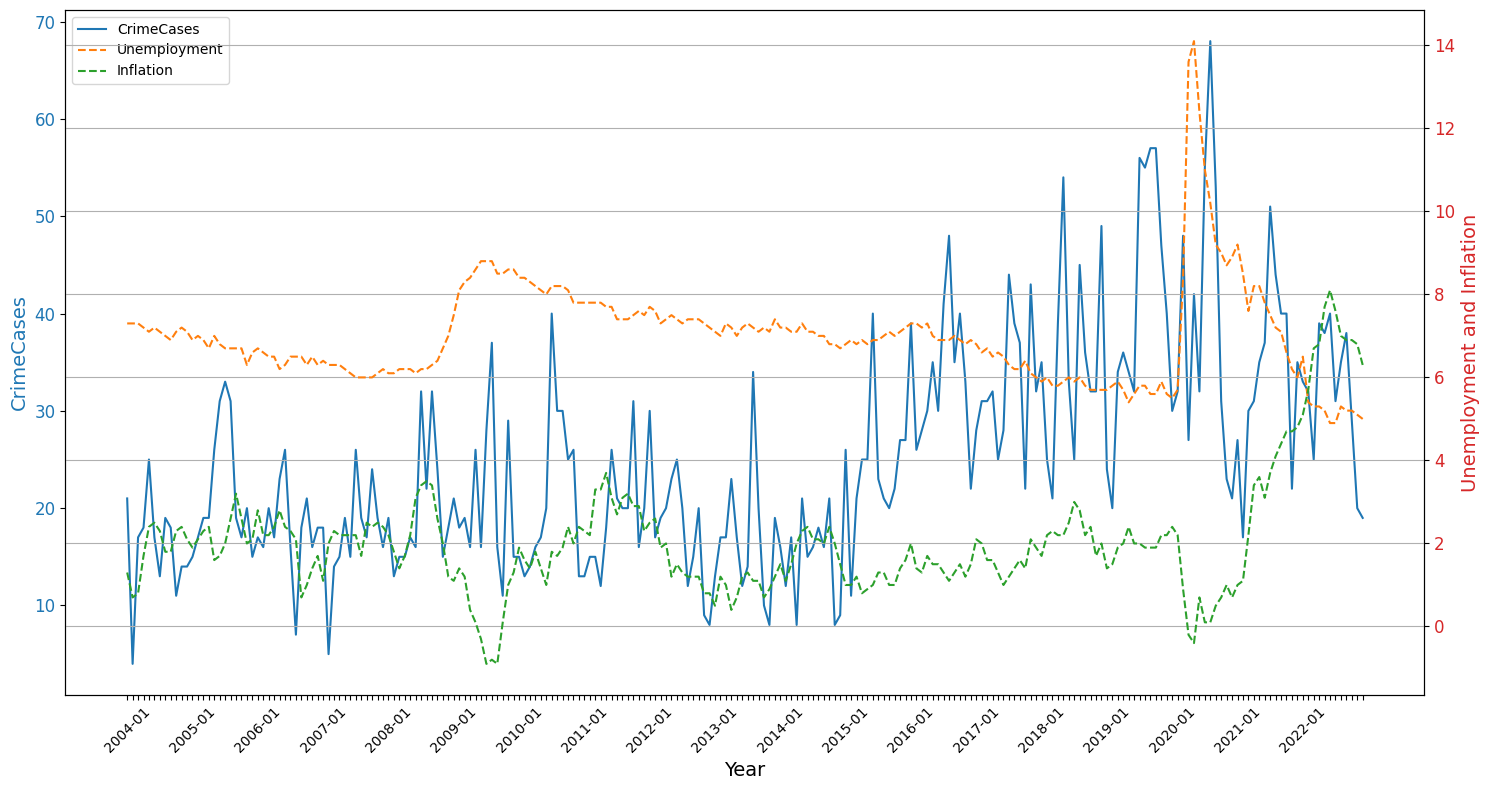

In [438]:
# Create the plot again
fig, ax1 = plt.subplots(figsize=(15, 8))

color = 'tab:blue'
ax1.set_xlabel('Year', fontsize=14)
ax1.set_ylabel('CrimeCases', color=color, fontsize=14)
line1, = ax1.plot(regression_data['YearMonth'].astype(str), regression_data['CrimeCases'], color=color, label='CrimeCases')
ax1.tick_params(axis='y', labelcolor=color, labelsize=12)

ax2 = ax1.twinx()  
color = 'tab:red'
ax2.set_ylabel('Unemployment and Inflation', color=color, fontsize=14)  
line2, = ax2.plot(regression_data['YearMonth'].astype(str), regression_data['Unemployment'], color='tab:orange', linestyle='--', label='Unemployment')
line3, = ax2.plot(regression_data['YearMonth'].astype(str), regression_data['Inflation'], color='tab:green', linestyle='--', label='Inflation')
ax2.tick_params(axis='y', labelcolor=color, labelsize=12)

# Combine the legend from both ax1 and ax2
lines = [line1, line2, line3]
labels = [line.get_label() for line in lines]
ax1.legend(lines, labels, loc='upper left')

# Only show every 12th x-axis label (approximately every year)
for i, label in enumerate(ax1.xaxis.get_ticklabels()):
    if i % 12 != 0:
        label.set_visible(False)
    else:
        label.set_rotation(45)
        label.set_text(regression_data['YearMonth'].iloc[i].year)  # Set the label to the year only

fig.tight_layout()  
plt.grid()
plt.show()

In [282]:
import statsmodels.api as sm
# Define the independent variables
X = regression_data[['Unemployment', 'Inflation']]
X = sm.add_constant(X)  # add a constant (intercept term) to the predictors

# Define the dependent variable
y = regression_data['CrimeCases']

# Fit a linear regression model
linear_model = sm.OLS(y, X).fit()

# Display the summary of the regression model
linear_model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             CrimeCases   R-squared:                       0.022
Model:                            OLS   Adj. R-squared:                  0.014
Method:                 Least Squares   F-statistic:                     2.577
Date:                Sat, 22 Jul 2023   Prob (F-statistic):             0.0783
Time:                        23:15:51   Log-Likelihood:                -873.79
No. Observations:                 228   AIC:                             1754.
Df Residuals:                     225   BIC:                             1764.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           18.7853      5.841      3.216      0.001       7.275      30.296
Unemployment     0.4985      0.720      0.692      0.490      -0.921       1.918
Inflation        1.3291      0.603      2.205      0.028       0.141       2.517
==============================================================================
Omnibus:                       39.356   Durbin-Watson:                   0.645
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               55.457
Skew:                           1.058   Prob(JB):                     9.07e-13
Kurtosis:                       4.166   Cond. No.                         58.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The intercept (constant) is 18.82. This represents the estimated number of crime cases when all the independent variables are zero.

The coefficient for the unemployment rate (Unemployment) is 0.4955. This means that for a one-unit increase in the unemployment rate, we expect a 0.4955 increase in the number of crime cases, all else being equal. However, this variable is not statistically significant at the 0.05 level (p-value = 0.492), suggesting that changes in the unemployment rate might not have a significant effect on the crime rate.

The coefficient for the CPI (Inflation) is 1.3282. This means that for a one-unit increase in the CPI, we expect a 1.3282 increase in the number of crime cases, all else being equal. This variable is statistically significant at the 0.05 level (p-value = 0.029), indicating a significant positive relationship between the CPI and the crime rate.

The R-squared value is 0.022, which means that the model explains about 2.2% of the variability in the number of crime cases. This is a relatively low value, suggesting that the model might not be a good fit for the data. Other factors not included in the model might also influence the number of crime cases.

In [283]:
# Define the independent variable
X = regression_data[['Inflation']]
X = sm.add_constant(X)  # add a constant (intercept term) to the predictors

# Fit a linear regression model
linear_model_cpi_only = sm.OLS(y, X).fit()

# Display the summary of the regression model
linear_model_cpi_only.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             CrimeCases   R-squared:                       0.020
Model:                            OLS   Adj. R-squared:                  0.016
Method:                 Least Squares   F-statistic:                     4.686
Date:                Sat, 22 Jul 2023   Prob (F-statistic):             0.0315
Time:                        23:15:53   Log-Likelihood:                -874.03
No. Observations:                 228   AIC:                             1752.
Df Residuals:                     226   BIC:                             1759.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         22.7271      1.295     17.547      0.000      20.175      25.279
Inflation      1.1114      0.513      2.165      0.031       0.100       2.123
==============================================================================
Omnibus:                       40.181   Durbin-Watson:                   0.642
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               57.458
Skew:                           1.065   Prob(JB):                     3.34e-13
Kurtosis:                       4.229   Cond. No.                         4.88
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The intercept (constant) is 22.73. This represents the estimated number of crime cases when the CPI is zero.

The coefficient for the CPI (Inflation) is 1.1117. This means that for a one-unit increase in the CPI, we expect a 1.1117 increase in the number of crime cases. This variable is statistically significant at the 0.05 level (p-value = 0.031), indicating a significant positive relationship between the CPI and the crime rate.

The R-squared value is 0.020, which means that the model explains about 2% of the variability in the number of crime cases. This is a relatively low value, suggesting that the model might not be a good fit for the data. Other factors not included in the model might also influence the number of crime cases.

**if you are worrying about multicollinearity:**

In [284]:
# Calculate the correlation between the unemployment rate and the CPI
correlation = regression_data['Unemployment'].corr(regression_data['Inflation'])

# Calculate the variance inflation factor (VIF) for the unemployment rate and the CPI
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Add a constant to the DataFrame for the VIF calculation
X_vif = sm.add_constant(regression_data[['Unemployment', 'Inflation']])

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])]
vif["features"] = X_vif.columns

correlation, vif


(-0.5221418468095235,
    VIF Factor      features
 0   61.503385         const
 1    1.374820  Unemployment
 2    1.374820     Inflation)

The correlation between the unemployment rate and the CPI is -0.52, indicating a moderate negative correlation.

The Variance Inflation Factor (VIF) is a measure used to detect the severity of multicollinearity. A VIF of 1 indicates no correlation among the independent variables, and a VIF between 1 and 5 is generally considered acceptable.

The VIF for both the unemployment rate and the CPI is approximately 1.37, which is less than 5. This suggests that there isn't a high degree of multicollinearity between these two variables.

Therefore, you don't need to worry too much about multicollinearity between the unemployment rate and the CPI in this case.

In [285]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Standardize the independent variables
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Initialize the regression models
linear_regression = LinearRegression()
ridge_regression = Ridge()
lasso_regression = Lasso()
elastic_net_regression = ElasticNet()

# Fit the models
linear_regression.fit(X_train, y_train)
ridge_regression.fit(X_train, y_train)
lasso_regression.fit(X_train, y_train)
elastic_net_regression.fit(X_train, y_train)

# Make predictions
linear_pred = linear_regression.predict(X_test)
ridge_pred = ridge_regression.predict(X_test)
lasso_pred = lasso_regression.predict(X_test)
elastic_net_pred = elastic_net_regression.predict(X_test)

# Calculate the RMSE and R-squared for each model
linear_rmse = mean_squared_error(y_test, linear_pred, squared=False)
ridge_rmse = mean_squared_error(y_test, ridge_pred, squared=False)
lasso_rmse = mean_squared_error(y_test, lasso_pred, squared=False)
elastic_net_rmse = mean_squared_error(y_test, elastic_net_pred, squared=False)

linear_r2 = r2_score(y_test, linear_pred)
ridge_r2 = r2_score(y_test, ridge_pred)
lasso_r2 = r2_score(y_test, lasso_pred)
elastic_net_r2 = r2_score(y_test, elastic_net_pred)

# Display the results
results = pd.DataFrame({
    'Model': ['Linear', 'Ridge', 'Lasso', 'ElasticNet'],
    'RMSE': [linear_rmse, ridge_rmse, lasso_rmse, elastic_net_rmse],
    'R-squared': [linear_r2, ridge_r2, lasso_r2, elastic_net_r2]
})
results



,Model,RMSE,R-squared
0,Linear,9.853718,0.019969
1,Ridge,9.854708,0.019772
2,Lasso,10.052904,-0.020053
3,ElasticNet,9.996063,-0.008550


Linear Regression: The RMSE (Root Mean Square Error) is approximately 9.85, and the R-squared value is approximately 0.020. This means that about 2% of the variation in the number of crime cases can be explained by the model.

Ridge Regression: The RMSE is approximately 9.85, and the R-squared value is approximately 0.020. The results are very similar to those of the linear regression model.

Lasso Regression: The RMSE is approximately 10.05, and the R-squared value is approximately -0.020. The negative R-squared value suggests that the model fits the data worse than a horizontal line.

ElasticNet Regression: The RMSE is approximately 9.99, and the R-squared value is approximately -0.008. The negative R-squared value suggests that the model fits the data worse than a horizontal line.

In this case, the linear regression and ridge regression models seem to perform the best, but the R-squared values are quite low for all models, indicating that the models explain only a small percentage of the variation in the number of crime cases. This could be due to the presence of other factors not included in the models that influence the number of crime cases.



OLS again：

In [286]:
# Define the independent variables
X = regression_data[['Unemployment', 'Inflation']]
X = sm.add_constant(X)  # add a constant (intercept term) to the predictors

# Define the dependent variable
y = regression_data['CrimeCases']

# Fit a linear regression model
linear_model = sm.OLS(y, X).fit()

# Display the summary of the regression model
linear_model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             CrimeCases   R-squared:                       0.022
Model:                            OLS   Adj. R-squared:                  0.014
Method:                 Least Squares   F-statistic:                     2.577
Date:                Sat, 22 Jul 2023   Prob (F-statistic):             0.0783
Time:                        23:16:01   Log-Likelihood:                -873.79
No. Observations:                 228   AIC:                             1754.
Df Residuals:                     225   BIC:                             1764.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           18.7853      5.841      3.216      0.001       7.275      30.296
Unemployment     0.4985      0.720      0.692      0.490      -0.921       1.918
Inflation        1.3291      0.603      2.205      0.028       0.141       2.517
==============================================================================
Omnibus:                       39.356   Durbin-Watson:                   0.645
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               55.457
Skew:                           1.058   Prob(JB):                     9.07e-13
Kurtosis:                       4.166   Cond. No.                         58.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The intercept (constant) is 18.82. This represents the estimated number of crime cases when all the independent variables are zero.

The coefficient for the unemployment rate (Unemployment) is 0.4955. This means that for a one-unit increase in the unemployment rate, we expect a 0.4955 increase in the number of crime cases, all else being equal. However, this variable is not statistically significant at the 0.05 level (p-value = 0.492), suggesting that changes in the unemployment rate might not have a significant effect on the crime rate.

The coefficient for the CPI (Inflation) is 1.3282. This means that for a one-unit increase in the CPI, we expect a 1.3282 increase in the number of crime cases, all else being equal. This variable is statistically significant at the 0.05 level (p-value = 0.029), indicating a significant positive relationship between the CPI and the crime rate.

The R-squared value is 0.022, which means that the model explains about 2.2% of the variability in the number of crime cases. This is a relatively low value, suggesting that the model might not be a good fit for the data. Other factors not included in the model might also influence the number of crime cases.